# Lending Club Case Study 
## Introduction 
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

__`The objective is to study the variables which shall be available at the time of the application to identify the defaulters and reject their applications`__

# Data understanding

- The provided data is from 2007 till 2011 for the loan applicant who either fully paid the loan or defaulted or were current at that time.


In [389]:
# Import all the libraries required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns

# Ignore warnings which can occur due to  version problems
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline 

# Import the library to check the encoding
import chardet

# To Convert scientific values into readable format 
pd.options.display.float_format = '{:,.2f}'.format


In [390]:
# Checking the encoding of the loan.csv file
with open("loan.csv", "rb") as rawdata:
    loan_result = chardet.detect(rawdata.read(2000))

loan_result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [391]:
# Load the Loan data set
loans_df = pd.read_csv("loan.csv")

# Check the shape of the data to understand the number of rows and columns available
print(loans_df.shape)

(39717, 111)


In [392]:
#Check the details of the data like columns names, total number of non-null values 
#and Data types of each of the columns

loans_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [393]:
# Check the data types of all the attributes in the data frame
loans_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data cleaning
### Investigate  columns, rows for null values
- Calculate the percentage of the missing column
- Check the null values in the column
- Check the null values in the row
- Remove the null columns where <b> > 90%</b> data is missing using dropna method
- Remove columns where unique values are available as those are not going to help with our analysis
- Remove columns where <b> same values </b> are present for all the rows.
- Remove Customer behavior variables as those are post loan variables
- Separate month and year for loan issue date columns.
- Transform the malformed data to normalize the data types.
- Convert the years object type to float wherever needed
- Drop the rows where the loan status is current as this data will not help in achieving business objective
- Change the loan status to 1 or 0 for Charged off and fully paid

In [394]:
#Calculating the percentage of the null columns
(((loans_df.isna().sum()/loans_df.shape[0])*100).sort_values(ascending=False))

verification_status_joint   100.00
annual_inc_joint            100.00
mo_sin_old_rev_tl_op        100.00
mo_sin_old_il_acct          100.00
bc_util                     100.00
                             ...  
delinq_amnt                   0.00
policy_code                   0.00
earliest_cr_line              0.00
delinq_2yrs                   0.00
id                            0.00
Length: 111, dtype: float64

In [395]:
# Since the list has 111 elements lets get it ordered by count and sort it ascentding to get the count.

((loans_df.isna().sum(axis=0)/loans_df.shape[0])*100).value_counts().sort_values(ascending=False)

100.00    54
0.00      43
0.14       2
32.58      1
6.19       1
1.75       1
0.13       1
0.01       1
92.99      1
0.18       1
0.10       1
64.66      1
97.13      1
0.03       1
2.71       1
dtype: int64

#### Observation
1. 54 colums are 100% - Drop this
2. 2 columns > 90 % - Drop this

In [396]:
#Remove the columns for which are > 90% rows data is not available
#Set the threshold percent is 0.1% of length of data frame 

threshold_percent = 0.1*len(loans_df)
loans_df = loans_df.dropna(axis = 1, thresh=threshold_percent)
loans_df.shape

(39717, 55)

In [397]:
# Calculate the percentage of the missing row

((loans_df.isna().sum(axis=1)/loans_df.shape[0])*100).round(2)

0       0.01
1       0.00
2       0.01
3       0.00
4       0.00
        ... 
39712   0.01
39713   0.01
39714   0.02
39715   0.02
39716   0.01
Length: 39717, dtype: float64

In [398]:
# Since the list has 39717 elements lets get it ordered by count and sort it ascentding to get the count.
((loans_df.isna().sum(axis=1)/loans_df.shape[0])*100).value_counts().sort_values(ascending=False)

0.00    21394
0.01     8868
0.00     8238
0.01      881
0.01      319
0.01       13
0.02        4
dtype: int64

#### Observation
None of the row has significant percentage to drop any.

### Remove the customer behavior columns

`The customer behavior columns are not helpful in this analysis as those will be created/available after the loan is processed.`

In [399]:
#Drop the customer behavior variables which are not available at the time of loan application, 
#and thus they cannot be used as predictors for credit approval.
cust_behaviour_variables = ['delinq_2yrs',
                            'earliest_cr_line',
                            'inq_last_6mths',
                            'open_acc',
                            'pub_rec',
                            'revol_bal',
                            'revol_util',
                            'total_acc',
                            'out_prncp',
                            'out_prncp_inv',
                            'total_pymnt',
                            'total_pymnt_inv',
                            'total_rec_prncp',
                            'total_rec_int',
                            'total_rec_late_fee',
                            'recoveries',
                            'collection_recovery_fee',
                            'last_pymnt_d',
                            'last_pymnt_amnt',
                            'last_credit_pull_d',
                            'application_type',
                            'funded_amnt',
                            'delinq_amnt',
                            'mths_since_last_delinq',
                            'collections_12_mths_ex_med',
                            'funded_amnt_inv']


loans_df = loans_df.drop(columns=cust_behaviour_variables)
loans_df.shape

(39717, 29)

### Remove the unique value columns and single value fields

`These columns will not help to conclude the target`

In [400]:
((loans_df.nunique()/loans_df.shape[0])*100).sort_values(ascending=False)

id                         100.00
url                        100.00
member_id                  100.00
emp_title                   72.56
desc                        66.79
title                       49.39
installment                 38.73
annual_inc                  13.39
dti                          7.22
loan_amnt                    2.23
zip_code                     2.07
int_rate                     0.93
issue_d                      0.14
addr_state                   0.13
sub_grade                    0.09
purpose                      0.04
emp_length                   0.03
grade                        0.02
home_ownership               0.01
pub_rec_bankruptcies         0.01
loan_status                  0.01
verification_status          0.01
term                         0.01
pymnt_plan                   0.00
initial_list_status          0.00
policy_code                  0.00
acc_now_delinq               0.00
chargeoff_within_12_mths     0.00
tax_liens                    0.00
dtype: float64

#### Observation
1. Since <b> id, member_id url </b> has 100% unique value which will not be helpful in the analysis thus we can <b> drop </b> it.
2. <b> emp_title, desc </b> has higher percentage we will verify and decide to drop it or not.

In [401]:
loans_df  = loans_df.drop(columns=['id', 'member_id', 'url'])
loans_df.shape

(39717, 26)

In [402]:
# Check the loans description
pd.set_option('display.max_colwidth', None)
loans_df.desc.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [403]:
loans_df.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [404]:
loans_df.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

#### Observation
1. <b> desc and title</b> information is available in <b>purpose</b> which is more meaningful thus we will drop this.
2. <b>empt_title </b> has employer name which does add any value addition to our analysis we will drop this 

In [405]:
loans_df = loans_df.drop(['desc','emp_title', 'title'], axis=1)
loans_df.shape

(39717, 23)

### Columns inspections
1. Fix the data in the column 
2. Fix the datatypes if any after inspecting each column data
3. Check the unique data in the columns and take decision accordingly

In [406]:
# Check issue_d 
loans_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

#### Decision taken
1. Split the Year and Month and store store it into new 2 columns issue_d_month and issue_d_year respectively
2. Append 20 to the year dataset for example 11 will be 2011
3. Change the data types to integer for year
4. Drop the column issue_d as this will be redundant

In [407]:
loans_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'dti', 'initial_list_status', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [408]:
# Lets split the Year and Month and store it into new 2 columns issue_d_month and issue_d_year respectively
loans_df['issue_d_month'], loans_df['issue_d_year'] = loans_df.issue_d.str.split('-').str

# Append 20 to the year dataset for example 11 will be 2011
loans_df['issue_d_year'] = '20' + loans_df['issue_d_year']

# Change the data type to integer
loans_df['issue_d_year'] = loans_df['issue_d_year'].astype(int)

In [409]:
#As the we separated the month and year from issue_d column, removing the issue_d as it is a redudant column
loans_df = loans_df.drop('issue_d', axis = 1)
loans_df.shape

(39717, 24)

In [410]:
# Remove all the columns which as the same value or same value and NaN value
print (loans_df.chargeoff_within_12_mths.value_counts())
print (loans_df.acc_now_delinq.value_counts())
print (loans_df.initial_list_status.value_counts())
print (loans_df.pymnt_plan.value_counts())
print (loans_df.tax_liens.value_counts())
print (loans_df.policy_code.value_counts())


0.00    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64
0.00    39678
Name: tax_liens, dtype: int64
1    39717
Name: policy_code, dtype: int64


In [411]:
single_value_columns = ['chargeoff_within_12_mths', 
                        'acc_now_delinq', 
                        'initial_list_status', 
                        'pymnt_plan', 
                        'tax_liens', 
                        'policy_code']

loans_df = loans_df.drop(single_value_columns, axis = 1)
loans_df.shape

(39717, 18)

In [412]:
loans_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [413]:
# Verify emp_length column
loans_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Decision taken
1. Convert 10+ years = 10.5 
2. < 1 year = 0.5 

In [414]:
# Align the data types
# Replace 10+ years = 10.5 and < 1 year = 0.5 
loans_df.emp_length.replace({'10+ years' : '10.5 years','< 1 year' : '0.5 year'},inplace=True)

# Remove years from emp_lengtt and comvert it into float
loans_df.emp_length = loans_df.emp_length.apply(lambda x:float(str(x).split()[0]))

loans_df.emp_length.describe()

count   38,642.00
mean         5.15
std          3.65
min          0.50
25%          2.00
50%          4.00
75%          9.00
max         10.50
Name: emp_length, dtype: float64

In [415]:
#  Check int_rate column
loans_df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [416]:
# Remove the percentage from the interest rate and comvert it into float
loans_df.int_rate = loans_df.int_rate.apply(lambda x: float(x.replace('%','')))

In [417]:
loans_df.int_rate.head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [418]:
# Check term column
loans_df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [419]:
# Remove the months from the term convert it into int
loans_df.term = loans_df.term.str.split(' ').str[1].astype(int)

In [420]:
# Verify the change
loans_df.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

#### Loan status 
Step 1 : Status = 'Current', theey are neither fully paid not defaulted, so we willl drop the current loans data.

Step 2: Tag the other two values as Fully Paid = 0 and Charged Off = 1 to make your analysis simple and clean.

In [421]:
# Remove the rows where the loan_status = current we dont need it
loans_df = loans_df[~(loans_df.loan_status == "Current")]

In [422]:
# Check the values afrer the change is committed
loans_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [423]:
# Tag fully paid = 0 or Charged off = 1 to make your analysis simple and clean

loans_df.loan_status.replace({'Fully Paid' : 0,'Charged Off' : 1},inplace=True)

In [424]:
# Check the values afrer the change is committed
loans_df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [425]:
# Check the percentage of missing values to see which columns are of interest for imputation
round(100*(loans_df.isnull().sum()/len(loans_df.index)), 2).sort_values(ascending=False)

emp_length             2.68
pub_rec_bankruptcies   1.81
loan_amnt              0.00
loan_status            0.00
issue_d_month          0.00
dti                    0.00
addr_state             0.00
zip_code               0.00
purpose                0.00
verification_status    0.00
term                   0.00
annual_inc             0.00
home_ownership         0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
issue_d_year           0.00
dtype: float64

### Imputation recommendations

In [426]:
# Check representative data points for emp_length
loans_df.emp_length.describe()

count   37,544.00
mean         5.11
std          3.64
min          0.50
25%          2.00
50%          4.00
75%          9.00
max         10.50
Name: emp_length, dtype: float64

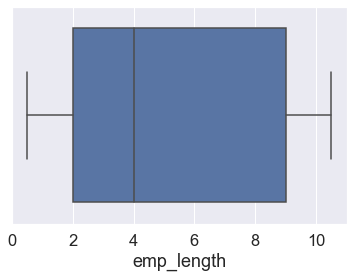

In [427]:
# Check for outliers
sns.boxplot(loans_df.emp_length)
plt.show()

#### Conclusion:  Column = emp_length

- Mean and Median there are no much difference and there are no  outliers as well thus we can chose 
<b>Mean = 5.11 </b> as impute value.

- Employee length directly impacts the loan amount eligibility and the salary, hence imputing the null values could lead to create the bias in the data
- As result of this, <b> we will remove the null values </b>
- Since the percentage of data is 2.5% a small percent this should not effect the analysis.


In [428]:
loans_df = loans_df[~(loans_df.emp_length.isnull())]

In [429]:
loans_df.pub_rec_bankruptcies.value_counts()

0.00    35312
1.00     1530
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [430]:
loans_df.pub_rec_bankruptcies.describe()

count   36,847.00
mean         0.04
std          0.20
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          2.00
Name: pub_rec_bankruptcies, dtype: float64

#### Conclusion:  Column = pub_rec_bankruptcies

Since most of the values 75% of data points are 0 thus we can chose <b>Median = 0 </b> as impute value.

In [431]:
round(100*(loans_df.isnull().sum()/len(loans_df.index)), 2).sort_values(ascending=False)

pub_rec_bankruptcies   1.86
loan_amnt              0.00
term                   0.00
issue_d_month          0.00
dti                    0.00
addr_state             0.00
zip_code               0.00
purpose                0.00
loan_status            0.00
verification_status    0.00
annual_inc             0.00
home_ownership         0.00
emp_length             0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
issue_d_year           0.00
dtype: float64

# Data Analysis
## Univariate Analysis - Quantitative Variables

#### Summary statistics

In [432]:
# The summary statiscs provides the descriptive statistics of the numeric variables
loans_df.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,pub_rec_bankruptcies,issue_d_year
count,"37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","37,544.00","36,847.00","37,544.00"
mean,"11,119.33",41.92,11.96,324.65,5.11,"69,407.08",0.14,13.28,0.04,"2,010.30"
std,"7,354.10",10.34,3.68,208.90,3.64,"64,676.98",0.35,6.66,0.20,0.89
min,500.00,36.00,5.42,15.69,0.50,"4,000.00",0.00,0.00,0.00,"2,007.00"
25%,"5,500.00",36.00,8.94,167.37,2.00,"41,000.00",0.00,8.16,0.00,"2,010.00"
50%,"10,000.00",36.00,11.83,280.00,4.00,"60,000.00",0.00,13.38,0.00,"2,011.00"
75%,"15,000.00",36.00,14.42,428.94,9.00,"83,000.00",0.00,18.55,0.00,"2,011.00"
max,"35,000.00",60.00,24.40,"1,305.19",10.50,"6,000,000.00",1.00,29.99,2.00,"2,011.00"


### Loan Amount (loan_amnt)

In [433]:
loans_df.loan_amnt.describe()

count   37,544.00
mean    11,119.33
std      7,354.10
min        500.00
25%      5,500.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

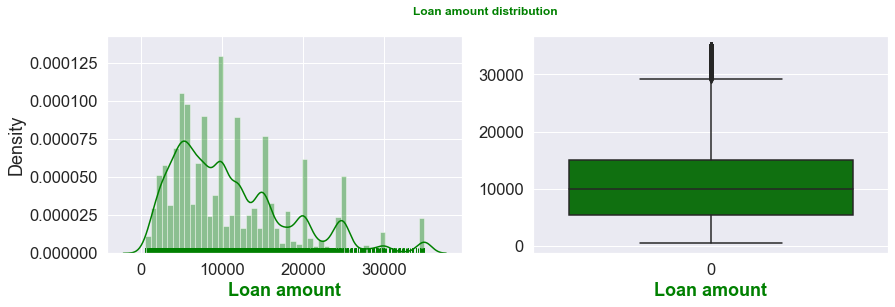

In [434]:
#Loan amount is a discrete numerical variable so we can use dist plot and box plot to analyse the information
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plot_1 = sns.distplot(a=loans_df.loan_amnt, rug=True, color='green')
plot_1.set_xlabel ('Loan amount',color='green',fontweight='bold')

plt.subplot(1,2,2)
plot_2 = sns.boxplot(data=loans_df.loan_amnt, color = 'green')
plot_2.set_xlabel ('Loan amount',color='green',fontweight='bold')

plt.suptitle('Loan amount distribution',color='green',fontweight='bold')
plt.show()

##### Analysis
-  The most preferred loan amount range varies from 5000 to 15000.
-  The median is 10000 and mean is 11141.32. There are a few outliers.
-  There are outliers ranging above 35000
-  The purpose may help to identify the different reasons for the smaller/larger amount of loans
-  The groupby on loan_status could help to identify the ratio of defaulters to the loan amount ranges.

### Interest rate (int_rate)

In [435]:
loans_df.int_rate.describe()

count   37,544.00
mean        11.96
std          3.68
min          5.42
25%          8.94
50%         11.83
75%         14.42
max         24.40
Name: int_rate, dtype: float64

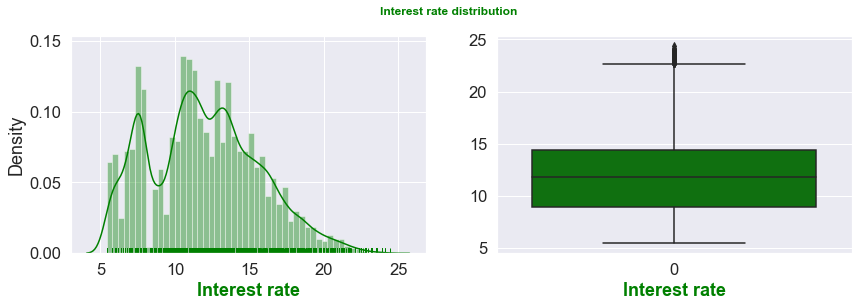

In [436]:
#Interest rate is a continuous numerical variable so we can use dist plot and box plot to analyse the information
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plot_1 = sns.distplot(a=loans_df.int_rate, rug=True, color='green')
plot_1.set_xlabel ('Interest rate',color='green',fontweight='bold')

plt.subplot(1,2,2)
plot_2 = sns.boxplot(data=loans_df.int_rate, color = 'green')
plot_2.set_xlabel ('Interest rate',color='green',fontweight='bold')

plt.suptitle('Interest rate distribution',color='green',fontweight='bold')
plt.show()

##### Analysis
-  The interest rates range varies from 8% to 15%.
-  The median intereset rate is ~11.86% and mean is 11.98 which means there are close to none outliers.
-  The grade and subgrade variables could help to understand the defaulters behavior

### Installment (installment)

In [437]:
loans_df.installment.describe()

count   37,544.00
mean       324.65
std        208.90
min         15.69
25%        167.37
50%        280.00
75%        428.94
max      1,305.19
Name: installment, dtype: float64

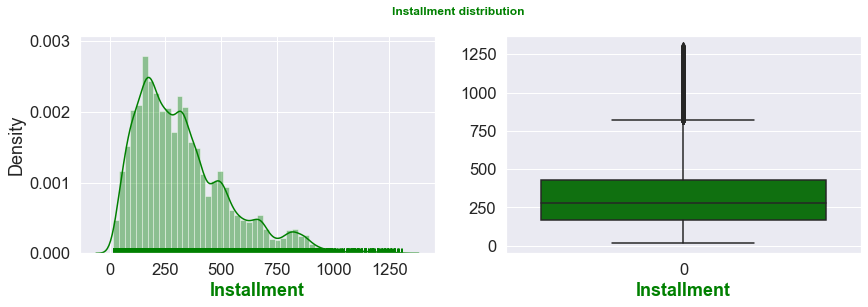

In [438]:
#Interest rate is a continuous numerical variable so we can use dist plot and box plot to analyse the information
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plot_1 = sns.distplot(a=loans_df.installment, rug=True, color='green')
plot_1.set_xlabel ('Installment',color='green',fontweight='bold')

plt.subplot(1,2,2)
plot_2 = sns.boxplot(data=loans_df.installment, color = 'green')
plot_2.set_xlabel ('Installment',color='green',fontweight='bold')


plt.suptitle('Installment distribution',color='green',fontweight='bold')
plt.show()

##### Analysis
-  The installment varies mostly between 167 and 428.
-  The median is ~280 and mean is ~324.
-  The defaulters' intstallments could provide more insights.

### Annual Income (annual_inc)

In [439]:
loans_df.annual_inc.describe()

count      37,544.00
mean       69,407.08
std        64,676.98
min         4,000.00
25%        41,000.00
50%        60,000.00
75%        83,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

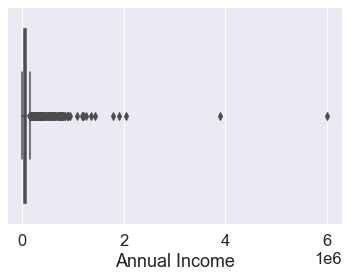

In [440]:
sns.boxplot(x=loans_df.annual_inc)
plt.xlabel('Annual Income')
plt.show()

#### Observation:
1. Data has too many outliers thus we will restrict the data < 100000
2. The median is ~60000 and mean is ~69000.
3.  The defaulters' annual incomes could provide more insights in the behaviorial pattern.

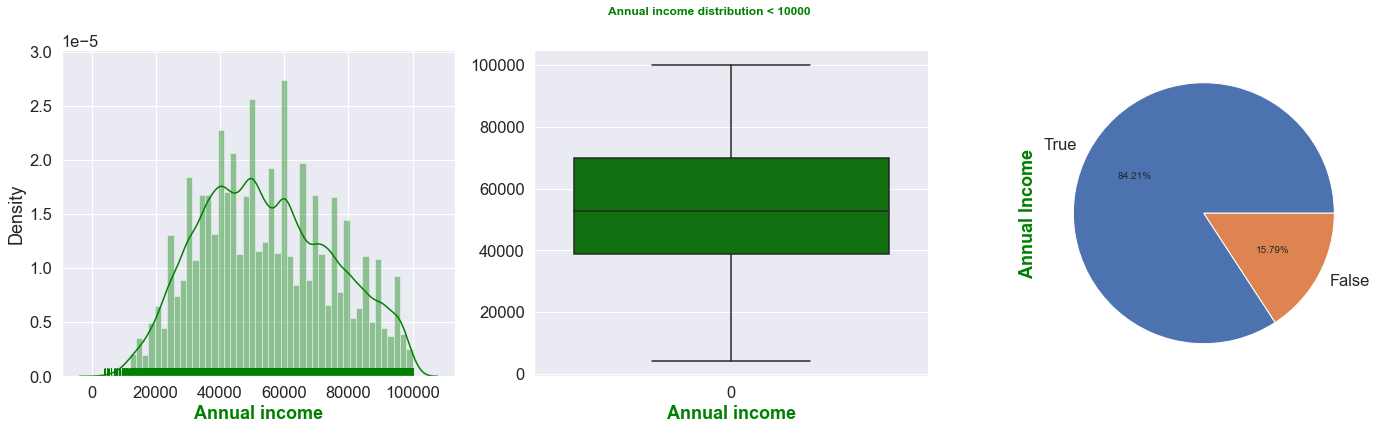

In [441]:
#Annual income is a continuous numerical variable so we can use dist plot and box plot to analyse the information

ann_dist = loans_df[loans_df.annual_inc < 100000]

plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
plot_1 = sns.distplot(a=ann_dist.annual_inc, rug=True, color='green')
plot_1.set_xlabel ('Annual income',color='green',fontweight='bold')


plt.subplot(1,3,2)
plot_2 = sns.boxplot(data=ann_dist.annual_inc, color = 'green')
plot_2.set_xlabel ('Annual income',color='green',fontweight='bold')


# subplot 2
plt.subplot(1, 3, 3)
plot_3 = (loans_df.annual_inc < 100000).value_counts().plot.pie(autopct='%1.2f%%')
plot_3.set_ylabel('Annual Income' ,color='green',fontweight='bold')


plt.suptitle('Annual income distribution < 10000',color='green',fontweight='bold')
plt.show()


#### Observation
1. 85% of loan applicant have got the income below 100000
2. 75% of loan applicant have got the income below 82000
3. Most of population income lies  between  42000 and 82000

### Debt to income ratio (dti)

In [442]:
loans_df.dti.describe()

count   37,544.00
mean        13.28
std          6.66
min          0.00
25%          8.16
50%         13.38
75%         18.55
max         29.99
Name: dti, dtype: float64

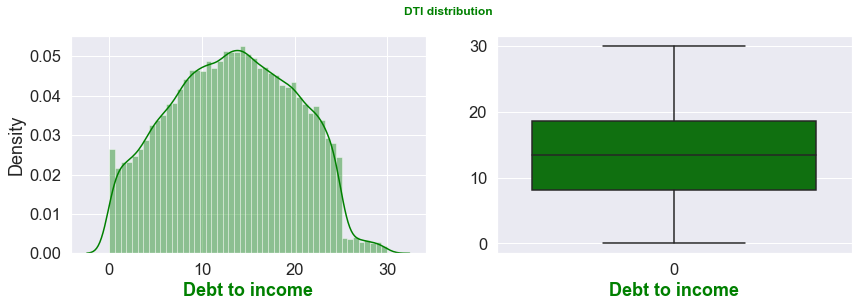

In [443]:
#DTI is a continuous numerical variable so we can use dist plot and box plot to analyse the information
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plot_1 = sns.distplot(a=loans_df.dti, color='green')
plot_1.set_xlabel ('Debt to income',color='green',fontweight='bold')

plt.subplot(1,2,2)
plot_2 = sns.boxplot(data=loans_df.dti, color = 'green')
plot_2.set_xlabel ('Debt to income',color='green',fontweight='bold')

plt.suptitle('DTI distribution',color='green',fontweight='bold')

plt.show()

##### Analysis
-  The DTI has close normal distribution.
-  The median is ~13.42 and mean is ~13.330.
-  The defaulters' DTI could provide more insights in the behaviorial pattern.

## Univariate Analysis - Catergorical  Variables


#### Term (term)

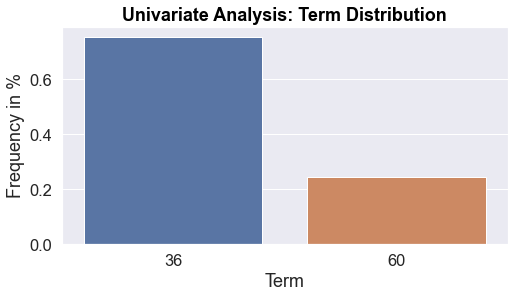

In [444]:
#Term is a ordered categorical numerical variable so we can use dist plot and box plot to analyse the information

plt.figure(figsize=(8,4))
term_data = loans_df.term.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='term', data=term_data)
plt.xlabel('Term')
plt.ylabel('Frequency in %')
plt.title('Univariate Analysis: Term Distribution',color='black',fontweight='bold')

plt.show()

##### Analysis
-  Most of the people are opting for 36 months loan which is obvious given the fact that the majority of the population sample is applying for loan ranging from 5000 to 15000
-  Loan Term, loan amount and defaulter's group could provide further insights

#### Grade (grade)

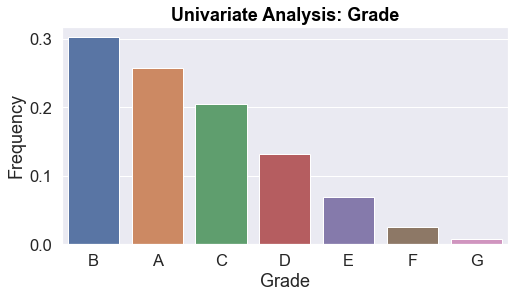

In [445]:
plt.figure(figsize=(8,4))

grade_data = loans_df.grade.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='grade', data=grade_data)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Grade',color='black',fontweight='bold')

plt.show()

##### Analysis
-  Most of the population sample is falling in the B grade which is an expected bucket for the population
-  In bivariate analysis, the corelation of defaulters with grades and subgrades will be quite insightful

#### Sub Grade (sub_grade)

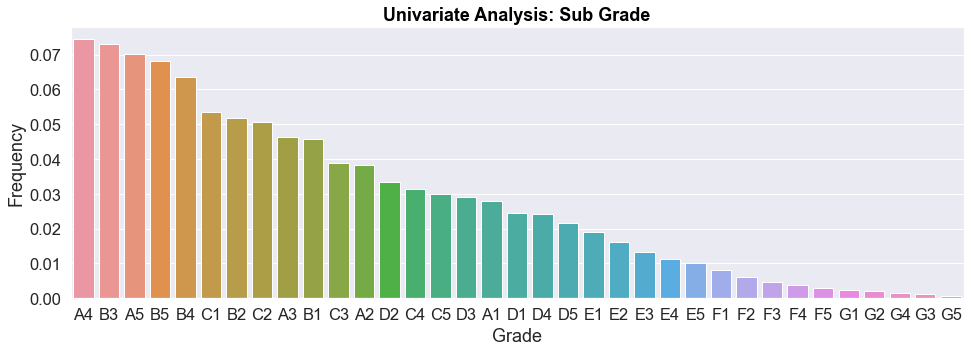

In [446]:
plt.figure(figsize=(16,5))

sub_grade_data = loans_df.sub_grade.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='sub_grade', data=sub_grade_data)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Sub Grade',color='black',fontweight='bold')

plt.show()

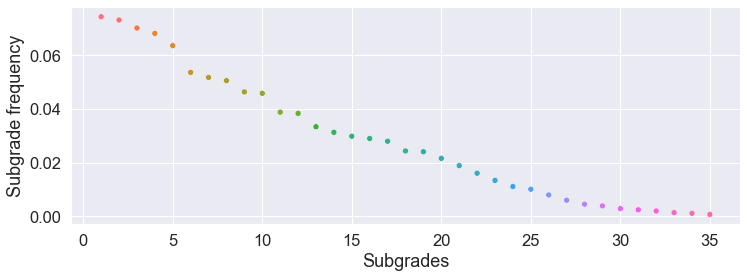

In [447]:
sub_grade_data = sub_grade_data.rename(columns={'index': 'subGradeKey'})
sub_grade_data['Rank'] = range(1,sub_grade_data.shape[0]+1)

plt.figure(figsize=[12,4])

graph = sns.scatterplot(sub_grade_data.Rank,sub_grade_data.sub_grade, hue=sub_grade_data.subGradeKey, legend = False)
graph.set(xlabel = 'Subgrades', ylabel='Subgrade frequency')

plt.show()

##### Analysis
-  As we can see there is a power law distribution available in the subgrade type, it is clear that there is a preferential attachment to the data set.
-  In bivariate analysis, the corelation of defaulters with grades and subgrades will be quite insightful

#### Employment experience (emp_length)

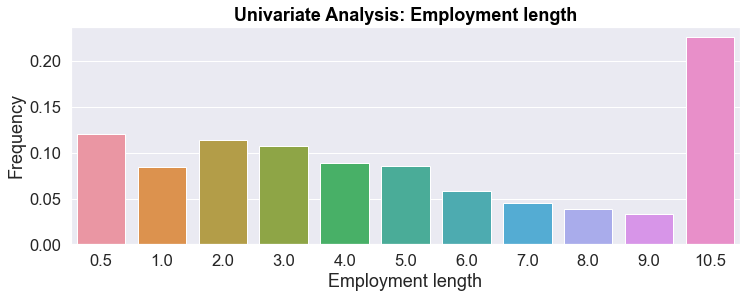

In [448]:
emp_length_data = loans_df.emp_length.value_counts(normalize=True).reset_index()

plt.figure(figsize=(12,4))
sns.barplot(x='index', y='emp_length', data=emp_length_data)
plt.xlabel('Employment length')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Employment length',color='black',fontweight='bold')
plt.show()

#### Analysis
1. Most of the loan applicents have tanure length is more than 10+ years constuting around 22.61%

#### Home Ownership  (home_ownership)


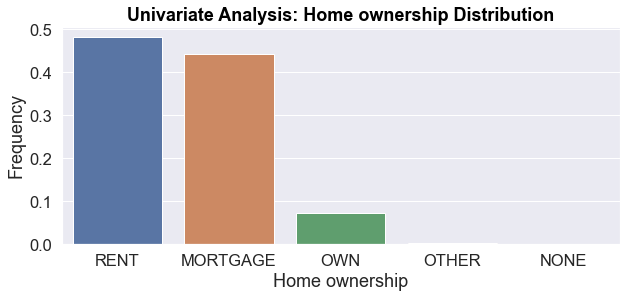

In [449]:
home_ownership_data = loans_df.home_ownership.value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='home_ownership', data=home_ownership_data)
plt.xlabel('Home ownership')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Home ownership Distribution',color='black',fontweight='bold')
plt.show()

#### Analysis
Most of the loan applicants are rented (47.9%) or Mortgage (44%). The applicants who own the house is (8%).


#### Verification Status  (verification_status)


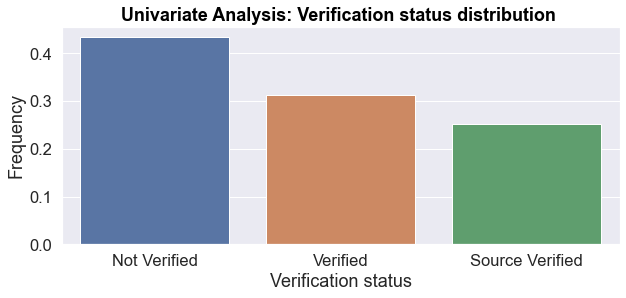

In [450]:
verification_status_data = loans_df.verification_status.value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='verification_status', data=verification_status_data)
plt.xlabel('Verification status')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Verification status distribution ',color='black',fontweight='bold')
plt.show()

<b>Analysis</b>
1. Around 57% of data points are verified
2. 43% of data are not verified

#### Loan Status  (loan_status)


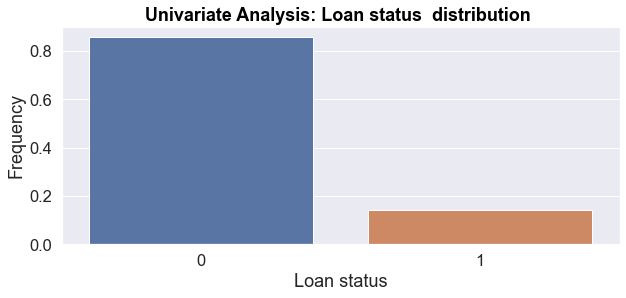

In [451]:
loan_status_data = loans_df.loan_status.value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='loan_status', data=loan_status_data)
plt.xlabel('Loan status')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Loan status  distribution ',color='black',fontweight='bold')
plt.show()

<b>Analysis</b> 
1. Around 85% of loans are fully paid
2. Only 15% of people are defaulters.

#### Purpose  (purpose)

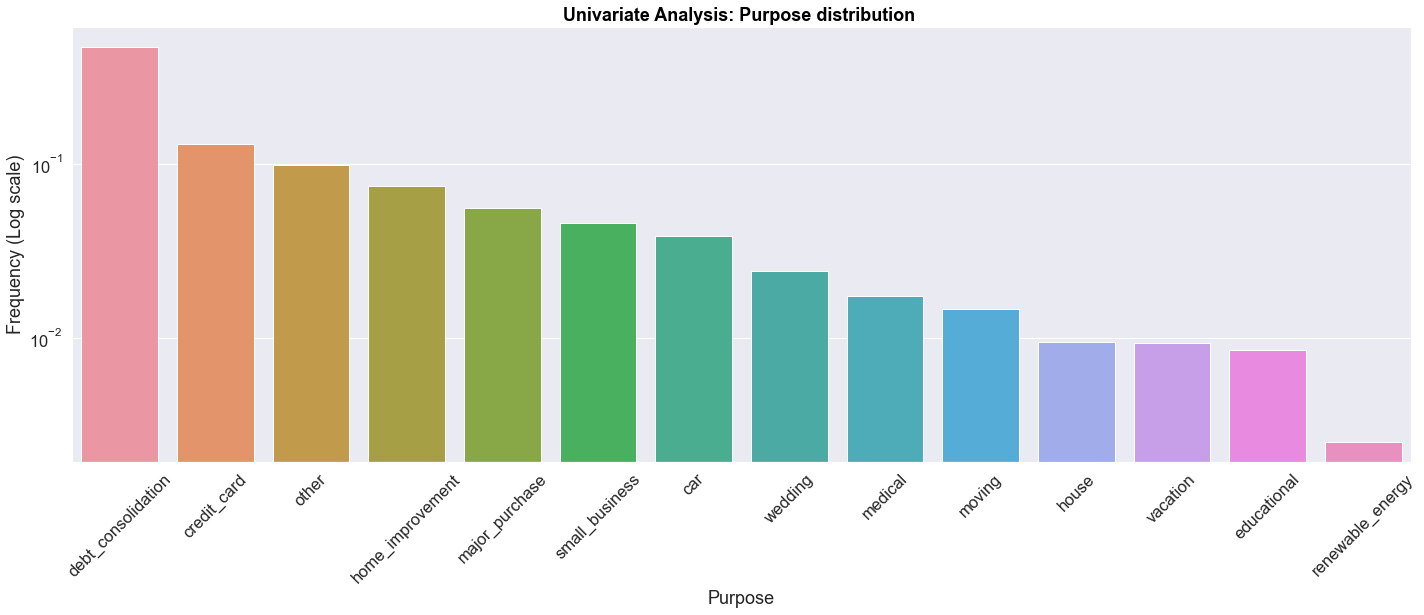

In [452]:
purpose_data = loans_df.purpose.value_counts(normalize=True).reset_index()
plt.figure(figsize=(24,8))
sns.barplot(x='index', y='purpose', data=purpose_data)
plt.yscale('log')
plt.xlabel('Purpose')
plt.ylabel('Frequency (Log scale)')
plt.xticks(rotation=45)
plt.title('Univariate Analysis: Purpose distribution ',color='black',fontweight='bold')
plt.show()

#### Analysis
Most of the loan purpose is for debt consolidation(45%+) followed by credit card (10% +)

#### Address Stats  (addr_state)

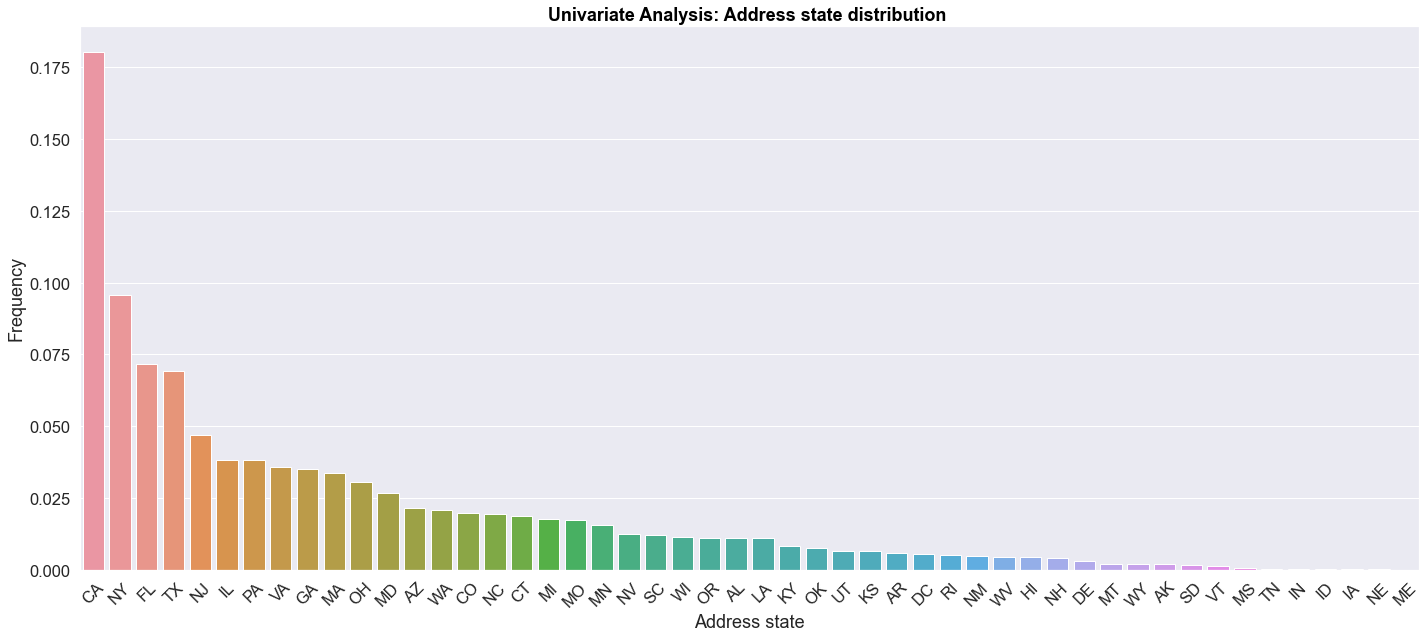

In [453]:
addr_state_data = loans_df.addr_state.value_counts(normalize=True).reset_index()
plt.figure(figsize=(24,10))
sns.barplot(x='index', y='addr_state', data=addr_state_data)
#plt.yscale('log')
plt.xlabel('Address state')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Univariate Analysis: Address state distribution ',color='black',fontweight='bold')
plt.show()

#### Analysis:

Top 5 states are
1. CA
2. NY
3. FL
4. TX
5. NJ

#### Issued Year (IssuedYear)

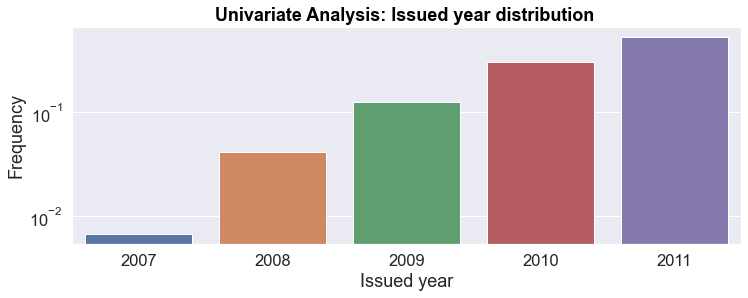

In [454]:
issue_d_year_data = loans_df.issue_d_year.value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='index', y='issue_d_year', data=issue_d_year_data)
plt.yscale('log')
plt.xlabel('Issued year')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.title('Univariate Analysis: Issued year distribution ',color='black',fontweight='bold')

plt.show()

#### Analysis
Every year the request is growing steadily

#### Issued Month (IssuedYear)


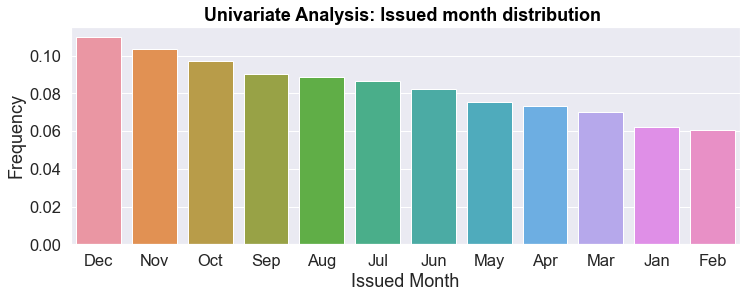

In [455]:
issue_d_mnth_data = loans_df.issue_d_month.value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='index', y='issue_d_month', data=issue_d_mnth_data)
plt.xlabel('Issued Month')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.title('Univariate Analysis: Issued month distribution ',color='black',fontweight='bold')
plt.show()

#### Analysis
1. December month is the month where highest loans were funded and February being lowest
2. Most of the funds were released in holiday season Nov - Dec

## Univariate Analysis - Segmented 

### Loan status v/s Interest Rates

In [456]:
loans_df.int_rate.describe()

count   37,544.00
mean        11.96
std          3.68
min          5.42
25%          8.94
50%         11.83
75%         14.42
max         24.40
Name: int_rate, dtype: float64

In [457]:
# Create the 7 segments for interest rate 
# Create a new derived column 'int_rate_bins' and store the values

loans_df['int_rate_bins'] = pd.cut(loans_df['int_rate'], [0, 6, 9, 12, 15, 18, 21, 25], 
                                labels=['0-6', '6-9', '9-12', '12-15', '15-18','18-21','21-25'])


loans_intrate_filter = loans_df.groupby(['int_rate_bins'])['loan_status'].value_counts().unstack().reset_index()

# Compute the fully paid and charged off percentage
loans_intrate_filter['1_percent'] = (loans_intrate_filter[1] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
loans_intrate_filter['0_percent'] = (loans_intrate_filter[0] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
print (loans_intrate_filter[['int_rate_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_intrate_filter[['int_rate_bins', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status int_rate_bins  0_percent
0                     0-6       0.96
1                     6-9       0.94
2                    9-12       0.88
3                   12-15       0.84
4                   15-18       0.77
5                   18-21       0.69
6                   21-25       0.56
------------------------------------------
loan_status int_rate_bins  1_percent
6                   21-25       0.44
5                   18-21       0.31
4                   15-18       0.23
3                   12-15       0.16
2                    9-12       0.12
1                     6-9       0.06
0                     0-6       0.04


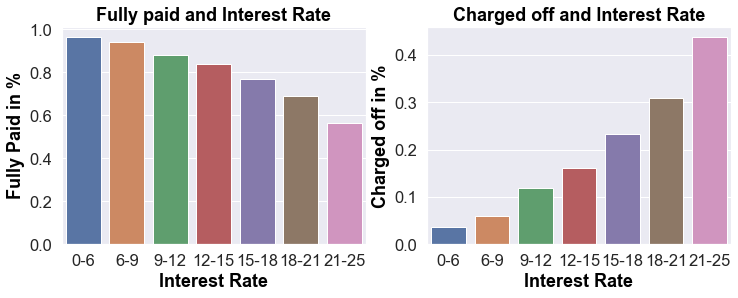

In [458]:
# Plot the data

plt.figure(figsize=(12,4))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='int_rate_bins', y='0_percent', data=loans_intrate_filter)
fig_1.set_title('Fully paid and Interest Rate',color='black',fontweight='bold')
fig_1.set_xlabel('Interest Rate', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='int_rate_bins', y='1_percent', data=loans_intrate_filter)
fig_2.set_title('Charged off and Interest Rate',color='black',fontweight='bold')
fig_2.set_xlabel('Interest Rate', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- Higher the interest rate higher the chances of being charged off 

### Loan status v/s Loan Amount

In [459]:
# Create 4 segments for loan amount by using q cut 4 quartiles

qcut_series , qcut_intervals= pd.qcut(loans_df.loan_amnt, q=4,
                                      labels=['low','medium', 'high', 'very high'],
                                      retbins=True)

# Create a new derived column 'loan_amnt_bins'

loans_df['loan_amnt_bins'] = qcut_series

# Compute the fully paid and charged off percentage

loans_loanamt_filter = loans_df.groupby(['loan_amnt_bins'])['loan_status'].value_counts().unstack().reset_index()
loans_loanamt_filter['1_percent'] = (loans_intrate_filter[1] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
loans_loanamt_filter['0_percent'] = (loans_intrate_filter[0] / (loans_intrate_filter[1] + loans_intrate_filter[0]))
print (loans_loanamt_filter[['loan_amnt_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_loanamt_filter[['loan_amnt_bins', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status loan_amnt_bins  0_percent
0                      low       0.96
1                   medium       0.94
2                     high       0.88
3                very high       0.84
------------------------------------------
loan_status loan_amnt_bins  1_percent
3                very high       0.16
2                     high       0.12
1                   medium       0.06
0                      low       0.04


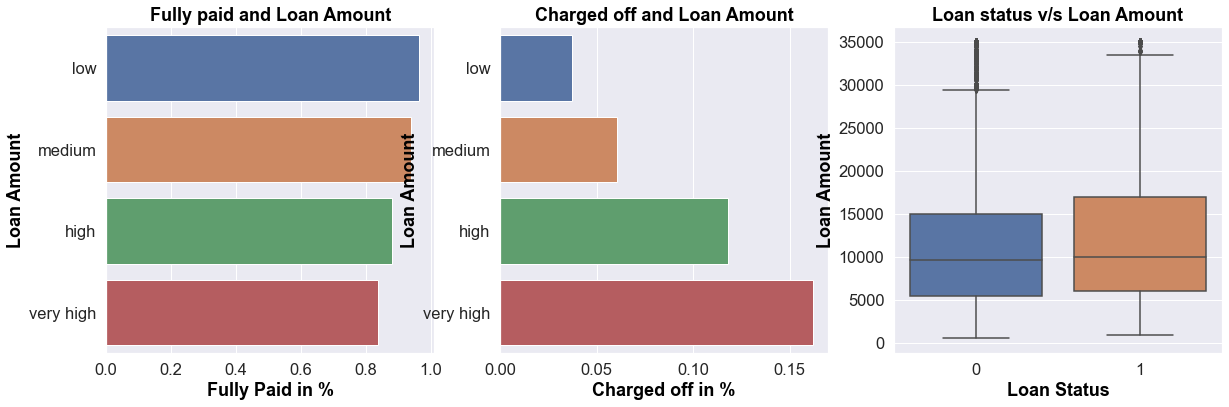

In [460]:
# Plot the graphs
plt.figure(figsize=(20,6))

# subplot 1
plt.subplot(1, 3, 1)
fig_1 = sns.barplot(y='loan_amnt_bins', x='0_percent', data=loans_loanamt_filter)
fig_1.set_title('Fully paid and Loan Amount',color='black',fontweight='bold')
fig_1.set_ylabel('Loan Amount', color='black',fontweight='bold')
fig_1.set_xlabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 3, 2)
fig_2 = sns.barplot(y='loan_amnt_bins', x='1_percent', data=loans_loanamt_filter)
fig_2.set_title('Charged off and Loan Amount',color='black',fontweight='bold')
fig_2.set_ylabel('Loan Amount', color='black',fontweight='bold')
fig_2.set_xlabel('Charged off in %' ,color='black',fontweight='bold')

plt.subplot(1, 3, 3)
#plt.title('Loan status vs Loan amount')
fig_3 = sns.boxplot(x=loans_df.loan_status, y=loans_df.loan_amnt, data=loans_df)
fig_3.set_title('Loan status v/s Loan Amount',color='black',fontweight='bold')
fig_3.set_ylabel('Loan Amount', color='black',fontweight='bold')
fig_3.set_xlabel('Loan Status' ,color='black',fontweight='bold')

plt.show()

### Observation

- Higher the loan amount higher the chances of being charged off
- No significant change in quantitative measures

In [461]:
# Create 4 segments for Annual Income by using q cut 4 quartiles

qcut_series , qcut_intervals= pd.qcut(loans_df.annual_inc, q=4,
                                      labels=['low','medium', 'high', 'very high'],
                                      retbins=True)

loans_df['ann_inc_bins'] = qcut_series

# Compute the fully paid and charged off percentage

ann_inc_filter = loans_df.groupby(['ann_inc_bins'])['loan_status'].value_counts().unstack().reset_index()
ann_inc_filter['1_percent'] = (ann_inc_filter[1] / (ann_inc_filter[1] + ann_inc_filter[0]))
ann_inc_filter['0_percent'] = (ann_inc_filter[0] / (ann_inc_filter[1] + ann_inc_filter[0]))
print (ann_inc_filter[['ann_inc_bins', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (ann_inc_filter[['ann_inc_bins', '1_percent']].sort_values(('1_percent'), ascending=False))


loan_status ann_inc_bins  0_percent
3              very high       0.89
2                   high       0.87
1                 medium       0.85
0                    low       0.82
------------------------------------------
loan_status ann_inc_bins  1_percent
0                    low       0.18
1                 medium       0.15
2                   high       0.13
3              very high       0.11


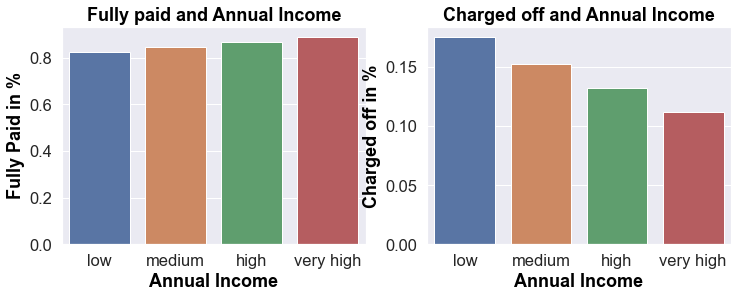

In [462]:
# Plot the graphs
plt.figure(figsize=(12,4))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='ann_inc_bins', y='0_percent', data=ann_inc_filter)
fig_1.set_title('Fully paid and Annual Income',color='black',fontweight='bold')
fig_1.set_xlabel('Annual Income', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='ann_inc_bins', y='1_percent', data=ann_inc_filter)
fig_2.set_title('Charged off and Annual Income',color='black',fontweight='bold')
fig_2.set_xlabel('Annual Income', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- Lower the annual income higher the chances of being charged off 

## Bi Variate  -  Categorical Analysis

### Loan status v/s Term

In [463]:
loans_term_filter = loans_df.groupby(['term'])['loan_status'].value_counts().unstack().reset_index()
loans_term_filter['1_percent'] = (loans_term_filter[1] / (loans_term_filter[1] + loans_term_filter[0]))
loans_term_filter['0_percent'] = (loans_term_filter[0] / (loans_term_filter[1] + loans_term_filter[0]))
print (loans_term_filter[['term', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_term_filter[['term', '1_percent']].sort_values(('1_percent'), ascending=True))

loan_status  term  0_percent
0              36       0.89
1              60       0.75
loan_status  term  1_percent
0              36       0.11
1              60       0.25


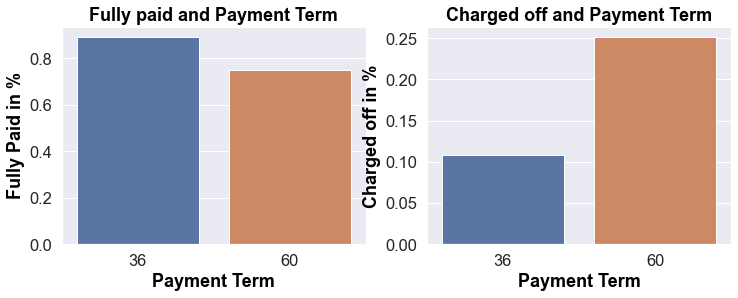

In [464]:
plt.figure(figsize=(12,4))


# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='term', y='0_percent', data=loans_term_filter)
fig_1.set_title('Fully paid and Payment Term',color='black',fontweight='bold')
fig_1.set_xlabel('Payment Term', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')

# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='term', y='1_percent', data=loans_term_filter)
fig_2.set_title('Charged off and Payment Term',color='black',fontweight='bold')
fig_2.set_xlabel('Payment Term', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- Those who have payment term as 60 months have for higher chance (25%) of being charged off 

### Loan status v/s Grade and Sub Grade

In [465]:
# Relationship between Grade and Target variable loan_status = 1 a.k.a chargeoff

loans_grade_filter = loans_df.groupby(['grade'])['loan_status'].value_counts().unstack().reset_index()
loans_grade_filter['1_percent'] = (loans_grade_filter[1] / (loans_grade_filter[1] + loans_grade_filter[0]))
loans_grade_filter['0_percent'] = (loans_grade_filter[0] / (loans_grade_filter[1] + loans_grade_filter[0]))
print (loans_grade_filter[['grade', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_grade_filter[['grade', '1_percent']].sort_values(('1_percent'), ascending=True))

loan_status grade  0_percent
0               A       0.94
1               B       0.88
2               C       0.83
3               D       0.78
4               E       0.73
5               F       0.67
6               G       0.66
loan_status grade  1_percent
0               A       0.06
1               B       0.12
2               C       0.17
3               D       0.22
4               E       0.27
5               F       0.33
6               G       0.34


In [466]:
# Relationship between Sub Grade and Target variable loan_status = 1 a.k.a chargeoff

loans_subgrade_filter = loans_df.groupby(['sub_grade'])['loan_status'].value_counts().unstack().reset_index()
loans_subgrade_filter['1_percent'] = (loans_subgrade_filter[1] / (loans_subgrade_filter[1] + loans_subgrade_filter[0]))
loans_subgrade_filter['0_percent'] = (loans_subgrade_filter[0] / (loans_subgrade_filter[1] + loans_subgrade_filter[0]))
print (loans_subgrade_filter[['sub_grade', '0_percent']].sort_values(('0_percent'), ascending=False).head(3))
print (loans_subgrade_filter[['sub_grade', '1_percent']].sort_values(('1_percent'), ascending=False).head(3))

loan_status sub_grade  0_percent
0                  A1       0.98
1                  A2       0.95
2                  A3       0.95
loan_status sub_grade  1_percent
29                 F5       0.48
32                 G3       0.42
31                 G2       0.36


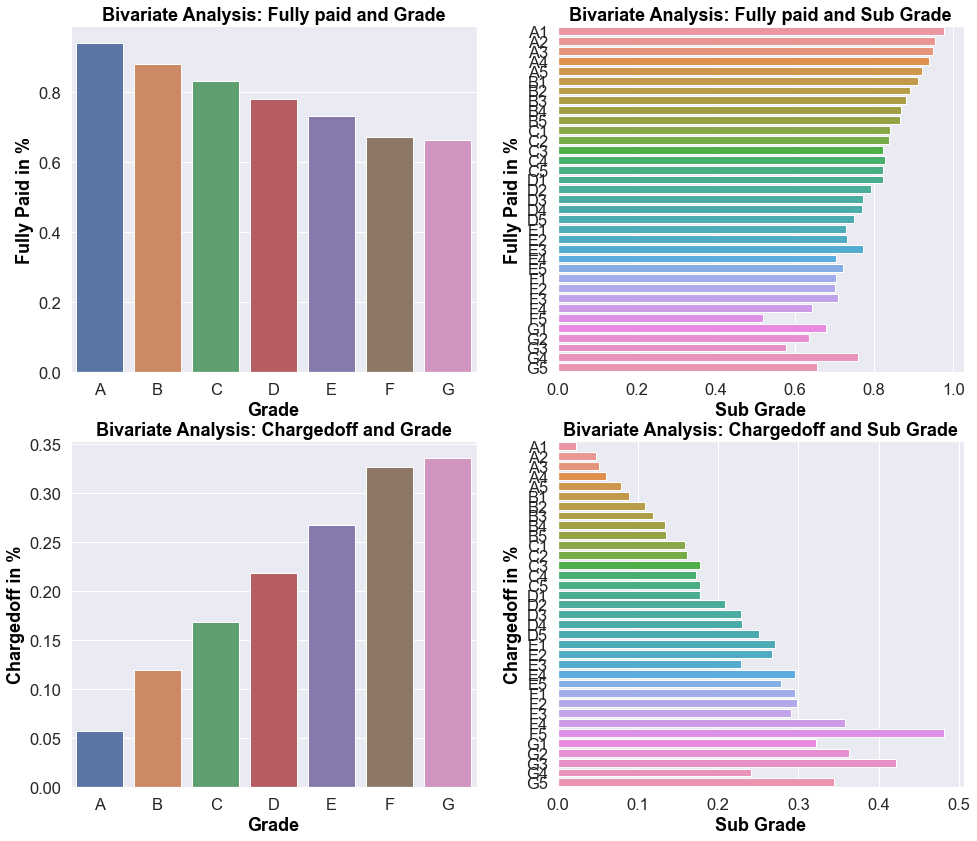

In [467]:
plt.figure(figsize=(16,14))

# subplot 1
plt.subplot(2, 2, 1)
fig_1 = sns.barplot(x='grade', y='0_percent', data=loans_grade_filter)
fig_1.set_title('Bivariate Analysis: Fully paid and Grade',color='black',fontweight='bold')
fig_1.set_xlabel('Grade', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(2, 2, 2)
fig_2 = sns.barplot(y='sub_grade', x='0_percent', data=loans_subgrade_filter)
fig_2.set_title('Bivariate Analysis: Fully paid and Sub Grade',color='black',fontweight='bold')
fig_2.set_xlabel('Sub Grade', color='black',fontweight='bold')
fig_2.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')

# subplot 3
plt.subplot(2, 2, 3)
fig_3 = sns.barplot(x='grade', y='1_percent', data=loans_grade_filter)
fig_3.set_title('Bivariate Analysis: Chargedoff and Grade',color='black',fontweight='bold')
fig_3.set_xlabel('Grade', color='black',fontweight='bold')
fig_3.set_ylabel('Chargedoff in %' ,color='black',fontweight='bold')

# subplot 4
plt.subplot(2, 2, 4)
fig_4 = sns.barplot(y='sub_grade', x='1_percent', data=loans_subgrade_filter)
fig_4.set_title('Bivariate Analysis: Chargedoff and Sub Grade',color='black',fontweight='bold')
fig_4.set_xlabel('Sub Grade', color='black',fontweight='bold')
fig_4.set_ylabel('Chargedoff in %' ,color='black',fontweight='bold')

plt.show()

#### Analysis
##### Grade
- <b>Grade "A"</b> has <b>high percentage of Fully paid </b> which is <b>94% </b> thus low probability of being charged off
- <b>Grade "G"</b> has <b>less percentage of Fully paid </b>which is <b>34% </b> thus high probability of being charged off

##### Sub Grade
- Top <b>3 sub grades</b> which has <b>high chance</b> of being <b>charged off</b>
1. <b>Sub Grade "F5" </b> has <b>48%</b> chance of being Charged off  
2. <b>Sub Grade "G3" </b> has <b>42%</b> chance of being Charged off  
3. <b>Sub Grade "G2" </b> has <b>36%</b> chance of being Charged off

- Top <b>3 sub grades</b> which has <b>high chance</b> of being <b>Fully paid</b>
1. <b>Sub Grade "A1" </b> has <b>97%</b> chance of being Fully paid  
2. <b>Sub Grade "A2" </b> has <b>95%</b> chance of being Fully paid  
3. <b>Sub Grade "A3" </b> has <b>94%</b> chance of being Fully paid

#### Key observation
1. <b> F5 </b> is been showing a significant percentage change within F grade in comparision to other sub grades.

### Loan status v/s Employee Length

In [468]:
loans_emplen_filter = loans_df.groupby(['emp_length'])['loan_status'].value_counts().unstack().reset_index()
loans_emplen_filter['1_percent'] = (loans_emplen_filter[1] / (loans_emplen_filter[1] + loans_emplen_filter[0]))
loans_emplen_filter['0_percent'] = (loans_emplen_filter[0] / (loans_emplen_filter[1] + loans_emplen_filter[0]))
print (loans_emplen_filter[['emp_length', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_emplen_filter[['emp_length', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status  emp_length  0_percent
9                  9.00       0.87
2                  2.00       0.87
4                  4.00       0.86
3                  3.00       0.86
8                  8.00       0.86
6                  6.00       0.86
0                  0.50       0.86
5                  5.00       0.86
1                  1.00       0.86
7                  7.00       0.85
10                10.50       0.84
loan_status  emp_length  1_percent
10                10.50       0.16
7                  7.00       0.15
1                  1.00       0.14
5                  5.00       0.14
0                  0.50       0.14
6                  6.00       0.14
8                  8.00       0.14
3                  3.00       0.14
4                  4.00       0.14
2                  2.00       0.13
9                  9.00       0.13


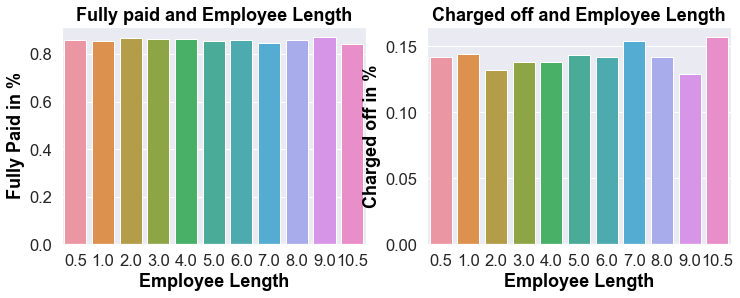

In [469]:
plt.figure(figsize=(12,4))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='emp_length', y='0_percent', data=loans_emplen_filter)
fig_1.set_title('Fully paid and Employee Length',color='black',fontweight='bold')
fig_1.set_xlabel('Employee Length', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='emp_length', y='1_percent', data=loans_emplen_filter)
fig_2.set_title('Charged off and Employee Length',color='black',fontweight='bold')
fig_2.set_xlabel('Employee Length', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Analysis:
#### Top 4 categories which have high chances of being charged off 
1. <b>10+ years </b> has around <b>16%</b> of chance. 
2. <b>7 years </b> has around <b>15%</b> of chance. 
3. <b>1 years </b> has around <b>14%</b> of chance.
4. <b> < 1 year </b> has around <b>14%</b> of chance.

#### Top 4 categories which have high chances of being fully paid 
1. <b>9 years </b> has around <b>87%</b> of chance. 
2. <b>2 years </b> has around <b>87%</b> of chance. 
3. <b>4 years </b> has around <b>86%</b> of chance.



#### Conclusion
1. Applicants who have 10+ years of experience have high chaces of being charged off, which is around 16% which is counter-intuitive. Normally as per intuition it should be < 1, but we see < 1 year - 3 years all have same range
at the same time Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. Other than this there much variations observed.

### Loan status v/s House Owners

In [470]:
loans_houseown_filter = loans_df.groupby(['home_ownership'])['loan_status'].value_counts().unstack().reset_index()
loans_houseown_filter['1_percent'] = (loans_houseown_filter[1] / (loans_houseown_filter[1] + loans_houseown_filter[0]))
loans_houseown_filter['0_percent'] = (loans_houseown_filter[0] / (loans_houseown_filter[1] + loans_houseown_filter[0]))
print (loans_houseown_filter[['home_ownership', '0_percent']].sort_values(('0_percent'), ascending=False))
print (loans_houseown_filter[['home_ownership', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status home_ownership  0_percent
0                 MORTGAGE       0.86
3                      OWN       0.86
4                     RENT       0.85
2                    OTHER       0.82
1                     NONE        NaN
loan_status home_ownership  1_percent
2                    OTHER       0.18
4                     RENT       0.15
3                      OWN       0.14
0                 MORTGAGE       0.14
1                     NONE        NaN


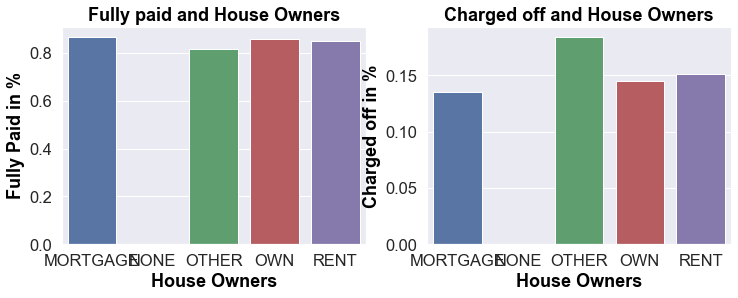

In [471]:
plt.figure(figsize=(12,4))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='home_ownership', y='0_percent', data=loans_houseown_filter)
fig_1.set_title('Fully paid and House Owners',color='black',fontweight='bold')
fig_1.set_xlabel('House Owners', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='home_ownership', y='1_percent', data=loans_houseown_filter)
fig_2.set_title('Charged off and House Owners',color='black',fontweight='bold')
fig_2.set_xlabel('House Owners', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- The relationship between owning a house and chance of being charged off which is counter intuitive. Reason being it is seen that those who own the house have greater chance of being charged off (15%), same as those who rent, in comparison to those who mortagage (14%)
- Those who mortgage the house have the highest chanc paying fully (86%) in comparison to those who own the house which is (85%)
- Those who fall in the other category has the highest chance (18%) of being charged off.

### Loan status v/s Purpose

In [472]:
loans_purpose_filter = loans_df.groupby(['purpose'])['loan_status'].value_counts().unstack().reset_index()
loans_purpose_filter['1_percent'] = (loans_purpose_filter[1] / (loans_purpose_filter[1] + loans_purpose_filter[0]))
loans_purpose_filter['0_percent'] = (loans_purpose_filter[0] / (loans_purpose_filter[1] + loans_purpose_filter[0]))
print (loans_purpose_filter[['purpose', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_purpose_filter[['purpose', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status             purpose  0_percent
13                      wedding       0.90
6                major_purchase       0.90
1                   credit_card       0.90
0                           car       0.89
4              home_improvement       0.88
12                     vacation       0.86
2            debt_consolidation       0.85
8                        moving       0.85
7                       medical       0.85
9                         other       0.84
3                   educational       0.84
5                         house       0.83
10             renewable_energy       0.81
11               small_business       0.73
------------------------------------------
loan_status             purpose  1_percent
11               small_business       0.27
10             renewable_energy       0.19
5                         house       0.17
3                   educational       0.16
9                         other       0.16
7                       medical       0.15
8          

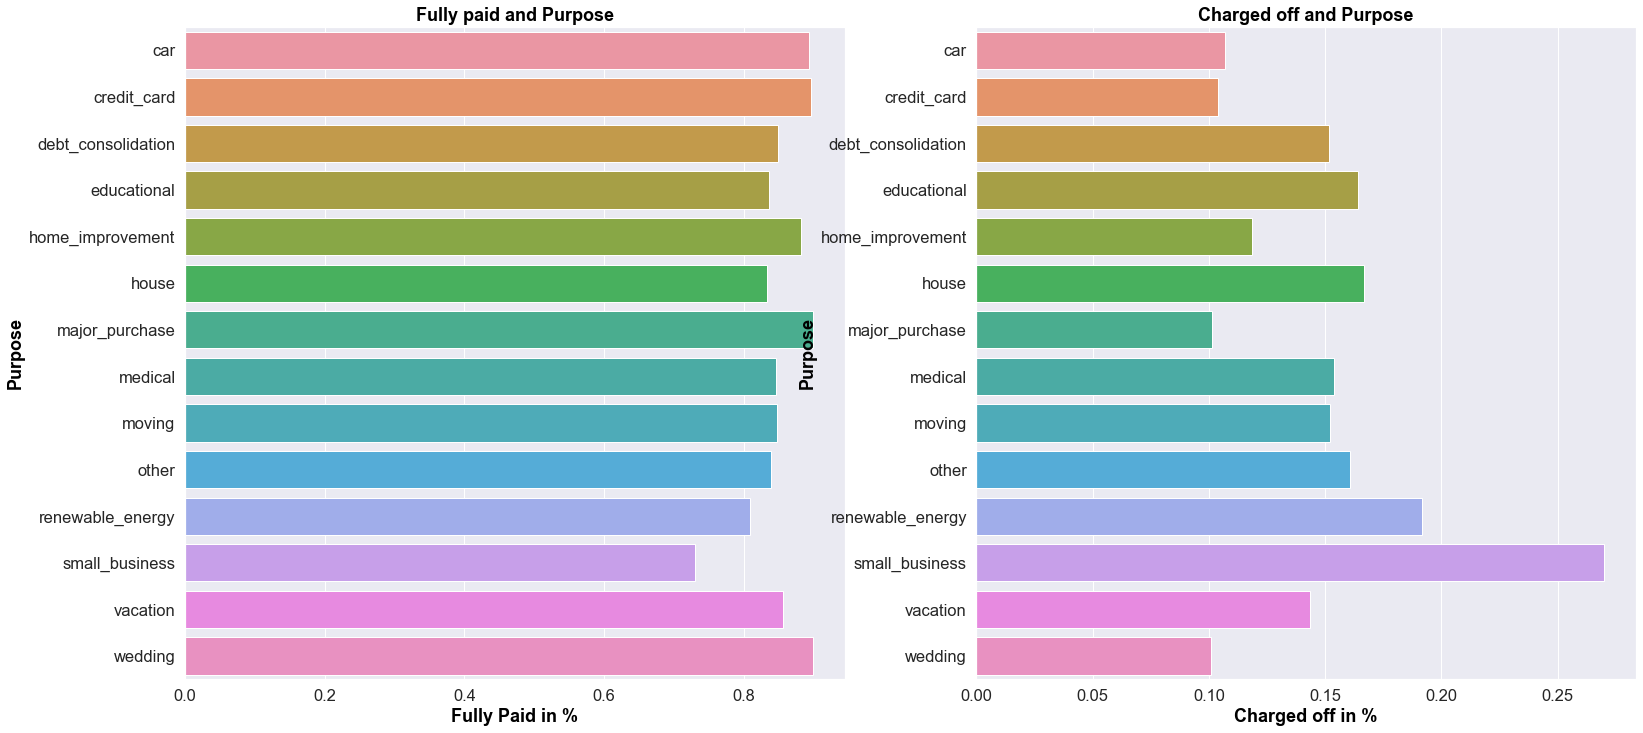

In [473]:
plt.figure(figsize=(26,12))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(y='purpose', x='0_percent', data=loans_purpose_filter)
fig_1.set_title('Fully paid and Purpose',color='black',fontweight='bold')
fig_1.set_ylabel('Purpose', color='black',fontweight='bold')
fig_1.set_xlabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(y='purpose', x='1_percent', data=loans_purpose_filter)
fig_2.set_title('Charged off and Purpose',color='black',fontweight='bold')
fig_2.set_ylabel('Purpose', color='black',fontweight='bold')
fig_2.set_xlabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- The purpose which has higher chance of being charged off is <b>Small Business (27%)</b> followed by (19%) <b> renewable energy </b> and <b> educational (17%) </b>

### Loan status v/s State

In [474]:
loans_addr_filter = loans_df.groupby(['addr_state'])['loan_status'].value_counts().unstack().reset_index()
loans_addr_filter['1_percent'] = (loans_addr_filter[1] / (loans_addr_filter[1] + loans_addr_filter[0]))
loans_addr_filter['0_percent'] = (loans_addr_filter[0] / (loans_addr_filter[1] + loans_addr_filter[0]))
print (loans_addr_filter[['addr_state', '0_percent']].sort_values(('0_percent'), ascending=False).head(10))
print ("------------------------------------------")
print (loans_addr_filter[['addr_state', '1_percent']].sort_values(('1_percent'), ascending=False).head(10))

loan_status addr_state  0_percent
49                  WY       0.96
7                   DC       0.93
25                  MS       0.89
16                  KS       0.89
8                   DE       0.89
45                  VT       0.89
2                   AR       0.89
41                  TN       0.88
19                  MA       0.88
37                  PA       0.88
------------------------------------------
loan_status addr_state  1_percent
28                  NE       0.60
32                  NV       0.22
0                   AK       0.20
40                  SD       0.18
9                   FL       0.18
11                  HI       0.17
13                  ID       0.17
36                  OR       0.16
24                  MO       0.16
31                  NM       0.16


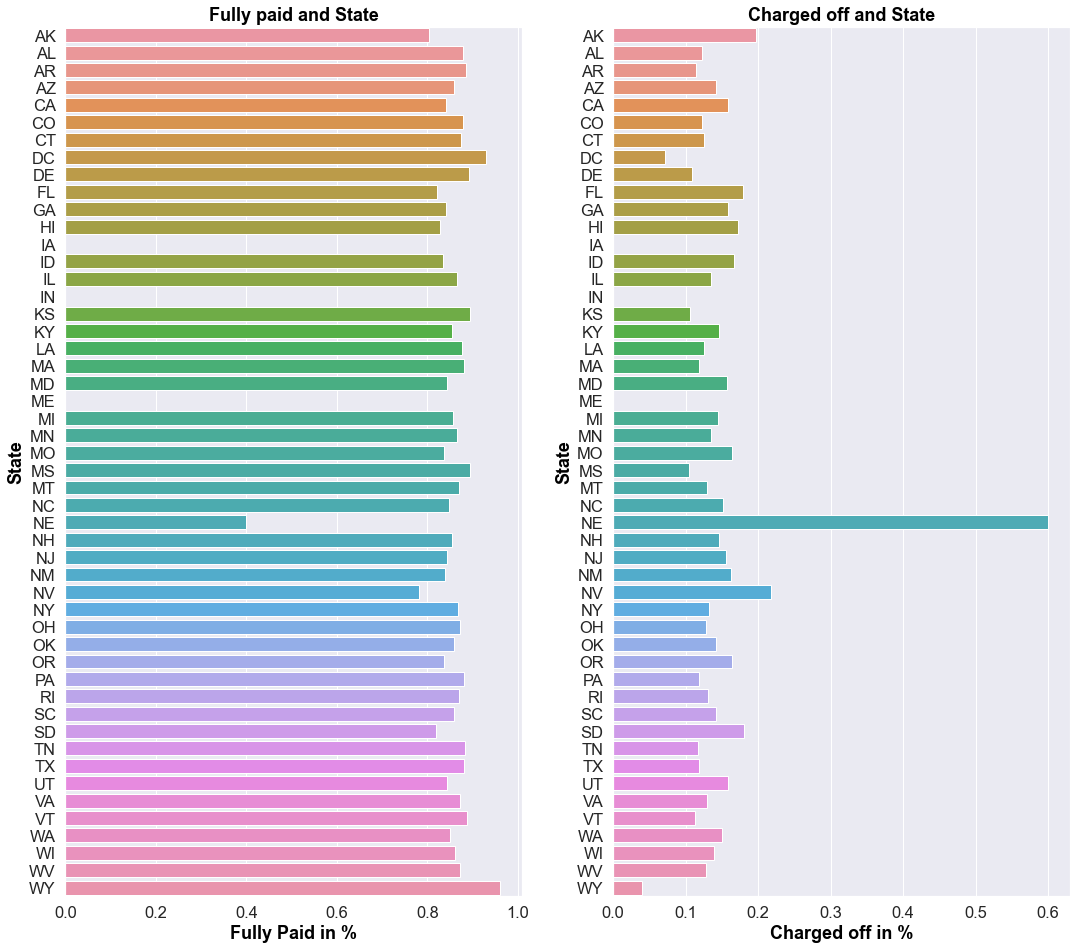

In [475]:
plt.figure(figsize=(18,16))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(y='addr_state', x='0_percent', data=loans_addr_filter)
fig_1.set_title('Fully paid and State',color='black',fontweight='bold')
fig_1.set_ylabel('State', color='black',fontweight='bold')
fig_1.set_xlabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(y='addr_state', x='1_percent', data=loans_addr_filter)
fig_2.set_title('Charged off and State',color='black',fontweight='bold')
fig_2.set_ylabel('State', color='black',fontweight='bold')
fig_2.set_xlabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- The state which has higher chance of being charged off is <b>NE (60%)</b> 

### Loan status v/s Month

In [476]:
loans_month_filter = loans_df.groupby(['issue_d_month'])['loan_status'].value_counts().unstack().reset_index()
loans_month_filter['1_percent'] = (loans_month_filter[1] / (loans_month_filter[1] + loans_month_filter[0]))
loans_month_filter['0_percent'] = (loans_month_filter[0] / (loans_month_filter[1] + loans_month_filter[0]))
print (loans_month_filter[['issue_d_month', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_month_filter[['issue_d_month', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status issue_d_month  0_percent
3                     Feb       0.88
7                     Mar       0.87
0                     Apr       0.87
4                     Jan       0.87
1                     Aug       0.86
5                     Jul       0.86
9                     Nov       0.85
6                     Jun       0.85
10                    Oct       0.85
11                    Sep       0.84
8                     May       0.84
2                     Dec       0.84
------------------------------------------
loan_status issue_d_month  1_percent
2                     Dec       0.16
8                     May       0.16
11                    Sep       0.16
10                    Oct       0.15
6                     Jun       0.15
9                     Nov       0.15
5                     Jul       0.14
1                     Aug       0.14
4                     Jan       0.13
0                     Apr       0.13
7                     Mar       0.13
3                     Feb       

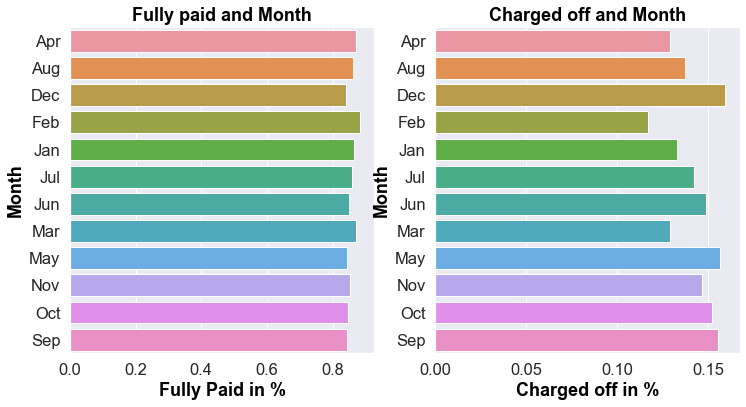

In [477]:
plt.figure(figsize=(12,6))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(y='issue_d_month', x='0_percent', data=loans_month_filter)
fig_1.set_title('Fully paid and Month',color='black',fontweight='bold')
fig_1.set_ylabel('Month', color='black',fontweight='bold')
fig_1.set_xlabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(y='issue_d_month', x='1_percent', data=loans_month_filter)
fig_2.set_title('Charged off and Month',color='black',fontweight='bold')
fig_2.set_ylabel('Month', color='black',fontweight='bold')
fig_2.set_xlabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- The month which has higher chance of being charged off is <b>May, September and December (16%)</b> 

### Loan status v/s Verification Status

In [478]:
loans_ver_filter = loans_df.groupby(['verification_status'])['loan_status'].value_counts().unstack().reset_index()
loans_ver_filter['1_percent'] = (loans_ver_filter[1] / (loans_ver_filter[1] + loans_ver_filter[0]))
loans_ver_filter['0_percent'] = (loans_ver_filter[0] / (loans_ver_filter[1] + loans_ver_filter[0]))
print (loans_ver_filter[['verification_status', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_ver_filter[['verification_status', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status verification_status  0_percent
0                  Not Verified       0.87
1               Source Verified       0.85
2                      Verified       0.83
------------------------------------------
loan_status verification_status  1_percent
2                      Verified       0.17
1               Source Verified       0.15
0                  Not Verified       0.13


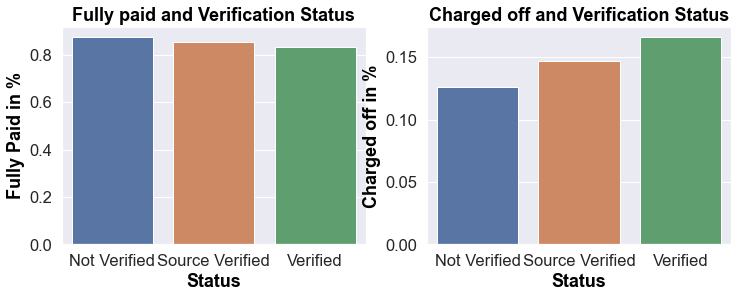

In [479]:
plt.figure(figsize=(12,4))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='verification_status', y='0_percent', data=loans_ver_filter)
fig_1.set_title('Fully paid and Verification Status',color='black',fontweight='bold')
fig_1.set_xlabel('Status', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='verification_status', y='1_percent', data=loans_ver_filter)
fig_2.set_title('Charged off and Verification Status',color='black',fontweight='bold')
fig_2.set_xlabel('Status', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Observation

- The status which has higher chance of being charged off is <b>Verified (17%)</b> which is counter intuitive which alludes towards Not verified which is lowest

### Loan status v/s Bankruptcies

In [480]:
loans_bnkrpcy_filter = loans_df.groupby(['pub_rec_bankruptcies'])['loan_status'].value_counts().unstack().reset_index()
loans_bnkrpcy_filter['1_percent'] = (loans_ver_filter[1] / (loans_ver_filter[1] + loans_ver_filter[0]))
loans_bnkrpcy_filter['0_percent'] = (loans_ver_filter[0] / (loans_ver_filter[1] + loans_ver_filter[0]))
print (loans_bnkrpcy_filter[['pub_rec_bankruptcies', '0_percent']].sort_values(('0_percent'), ascending=False))
print ("------------------------------------------")
print (loans_bnkrpcy_filter[['pub_rec_bankruptcies', '1_percent']].sort_values(('1_percent'), ascending=False))

loan_status  pub_rec_bankruptcies  0_percent
0                            0.00       0.87
1                            1.00       0.85
2                            2.00       0.83
------------------------------------------
loan_status  pub_rec_bankruptcies  1_percent
2                            2.00       0.17
1                            1.00       0.15
0                            0.00       0.13


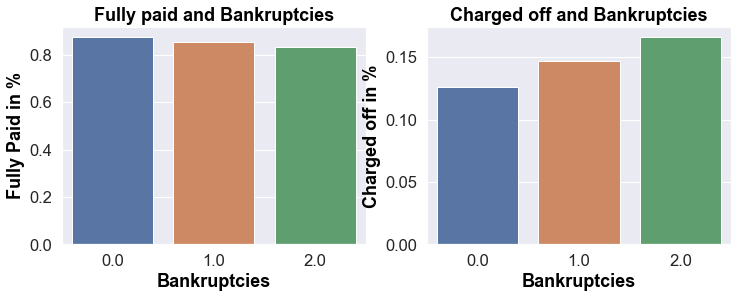

In [481]:
plt.figure(figsize=(12,4))

# subplot 1
plt.subplot(1, 2, 1)
fig_1 = sns.barplot(x='pub_rec_bankruptcies', y='0_percent', data=loans_bnkrpcy_filter)
fig_1.set_title('Fully paid and Bankruptcies',color='black',fontweight='bold')
fig_1.set_xlabel('Bankruptcies', color='black',fontweight='bold')
fig_1.set_ylabel('Fully Paid in %' ,color='black',fontweight='bold')


# subplot 2
plt.subplot(1, 2, 2)
fig_2 = sns.barplot(x='pub_rec_bankruptcies', y='1_percent', data=loans_bnkrpcy_filter)
fig_2.set_title('Charged off and Bankruptcies',color='black',fontweight='bold')
fig_2.set_xlabel('Bankruptcies', color='black',fontweight='bold')
fig_2.set_ylabel('Charged off in %' ,color='black',fontweight='bold')

plt.show()

### Analysis

- Those who have public record of Bankruptcies of 2.0 has (17%) of chance for being charged off
- Those who have no  publick record too have (14%) of chance for being charged off

### Relationship between quantitative measures

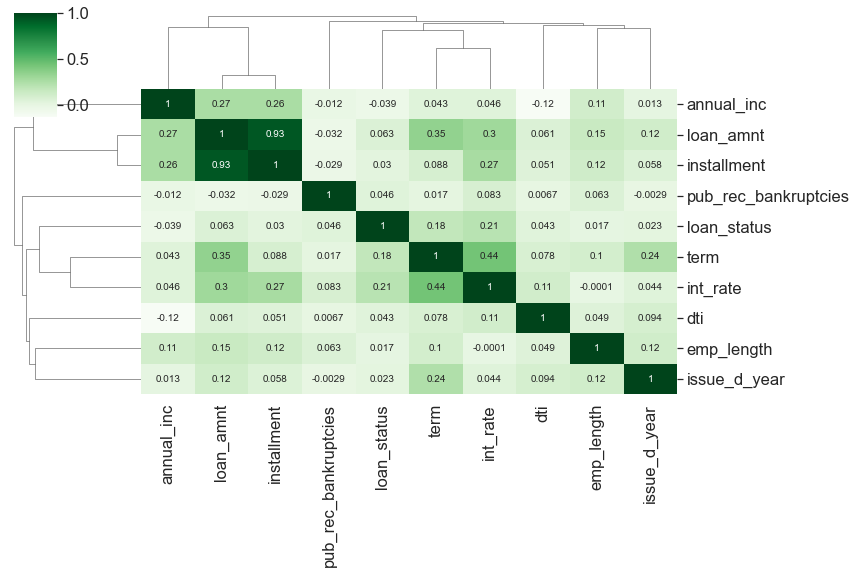

In [482]:
sns.clustermap(loans_df.corr(), cmap="Greens", annot=True,figsize=(12, 8))
plt.show()

### Observation
- Loan Amount to Installment got high correlation 
- Annual income to DTI has negative  correlation
- Loan Status to Annual income has negative correlation

### Bivariate Analysis - Loan Amount

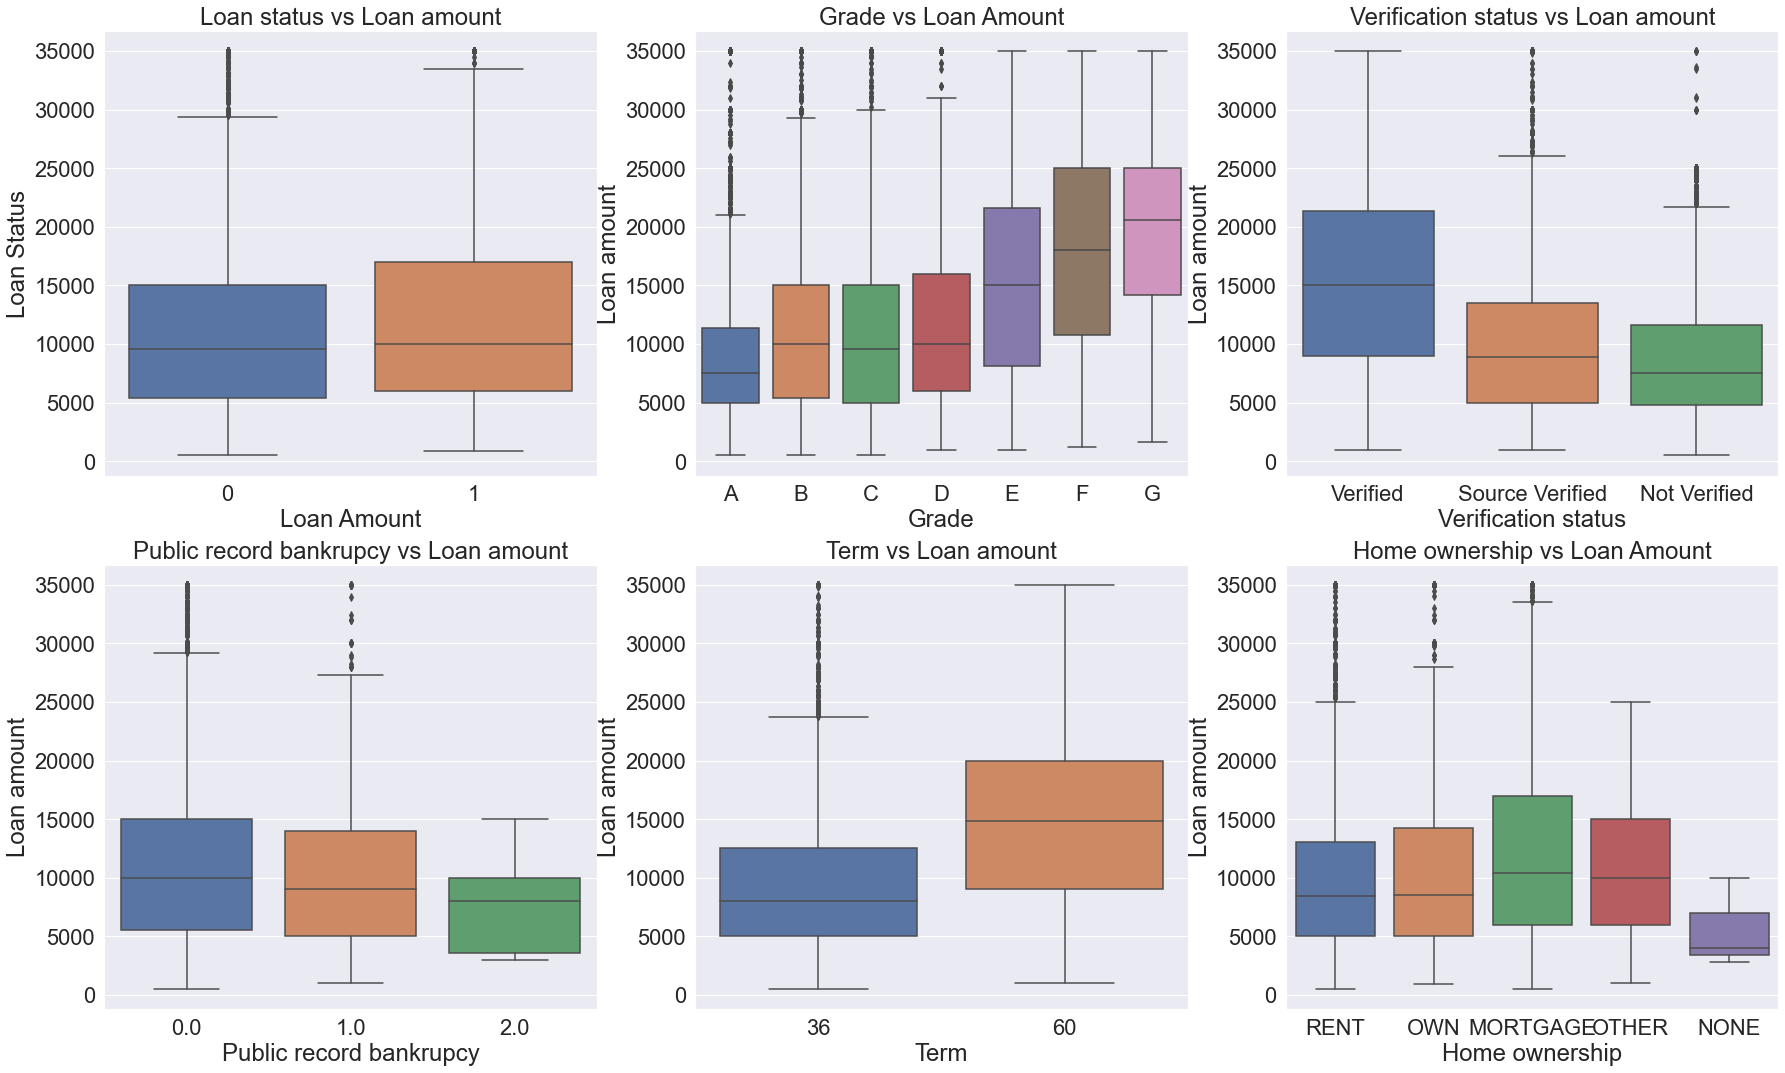

In [483]:
plt.figure(figsize=(30,18))
sns.set(font_scale=2) 

plt.subplot(2, 3, 1)
plt.title('Loan status vs Loan amount')
fig_1 = sns.boxplot(x=loans_df.loan_status, y=loans_df.loan_amnt, data=loans_df)
fig_1.set(xlabel = 'Loan Amount', ylabel='Loan Status')

plt.subplot(2,3,2)
plt.title('Grade vs Loan Amount')
grade_order = loans_df.grade.unique() #  Find the unique items in grade
grade_order.sort() # Sort the values 
fig_2 = sns.boxplot(x=loans_df.grade, y=loans_df.loan_amnt, order = grade_order, data=loans_df)
fig_2.set(xlabel = 'Grade', ylabel='Loan amount')

plt.subplot(2, 3, 3)
plt.title('Verification status vs Loan amount')
fig_3 = sns.boxplot(x=loans_df.verification_status, y=loans_df.loan_amnt, data=loans_df)
fig_3.set(xlabel = 'Verification status', ylabel='Loan amount')

plt.subplot(2, 3, 4)
plt.title('Public record bankrupcy vs Loan amount')
fig_4 = sns.boxplot(x=loans_df.pub_rec_bankruptcies, y=loans_df.loan_amnt, data=loans_df)
fig_4.set(xlabel = 'Public record bankrupcy', ylabel='Loan amount')

#plt.figure(figsize=(18,4))
#sns.set(font_scale=1.5) 

plt.subplot(2, 3, 5)
plt.title('Term vs Loan amount')
fig_5 = sns.boxplot(x=loans_df.term, y=loans_df.loan_amnt, data=loans_df)
fig_5.set(xlabel = 'Term', ylabel='Loan amount')

plt.subplot(2,3,6)
plt.title('Home ownership vs Loan Amount')
fig_6 = sns.boxplot(x=loans_df.home_ownership, y=loans_df.loan_amnt, data=loans_df)
fig_6.set(xlabel = 'Home ownership', ylabel='Loan amount')

plt.show()


#### Analysis
1. No significant relation between defautlers and loan amount
2. Lower the grade higher the loan amount
3. Loan amount is higher on the group of applicants who are verified 
4. Higher loan amount for the people who either 0 or 1.0 bankrupcy record
5. Loan amount is seen more for 60 months term
6. There is no significant differences observed in descriptive data for home ownership

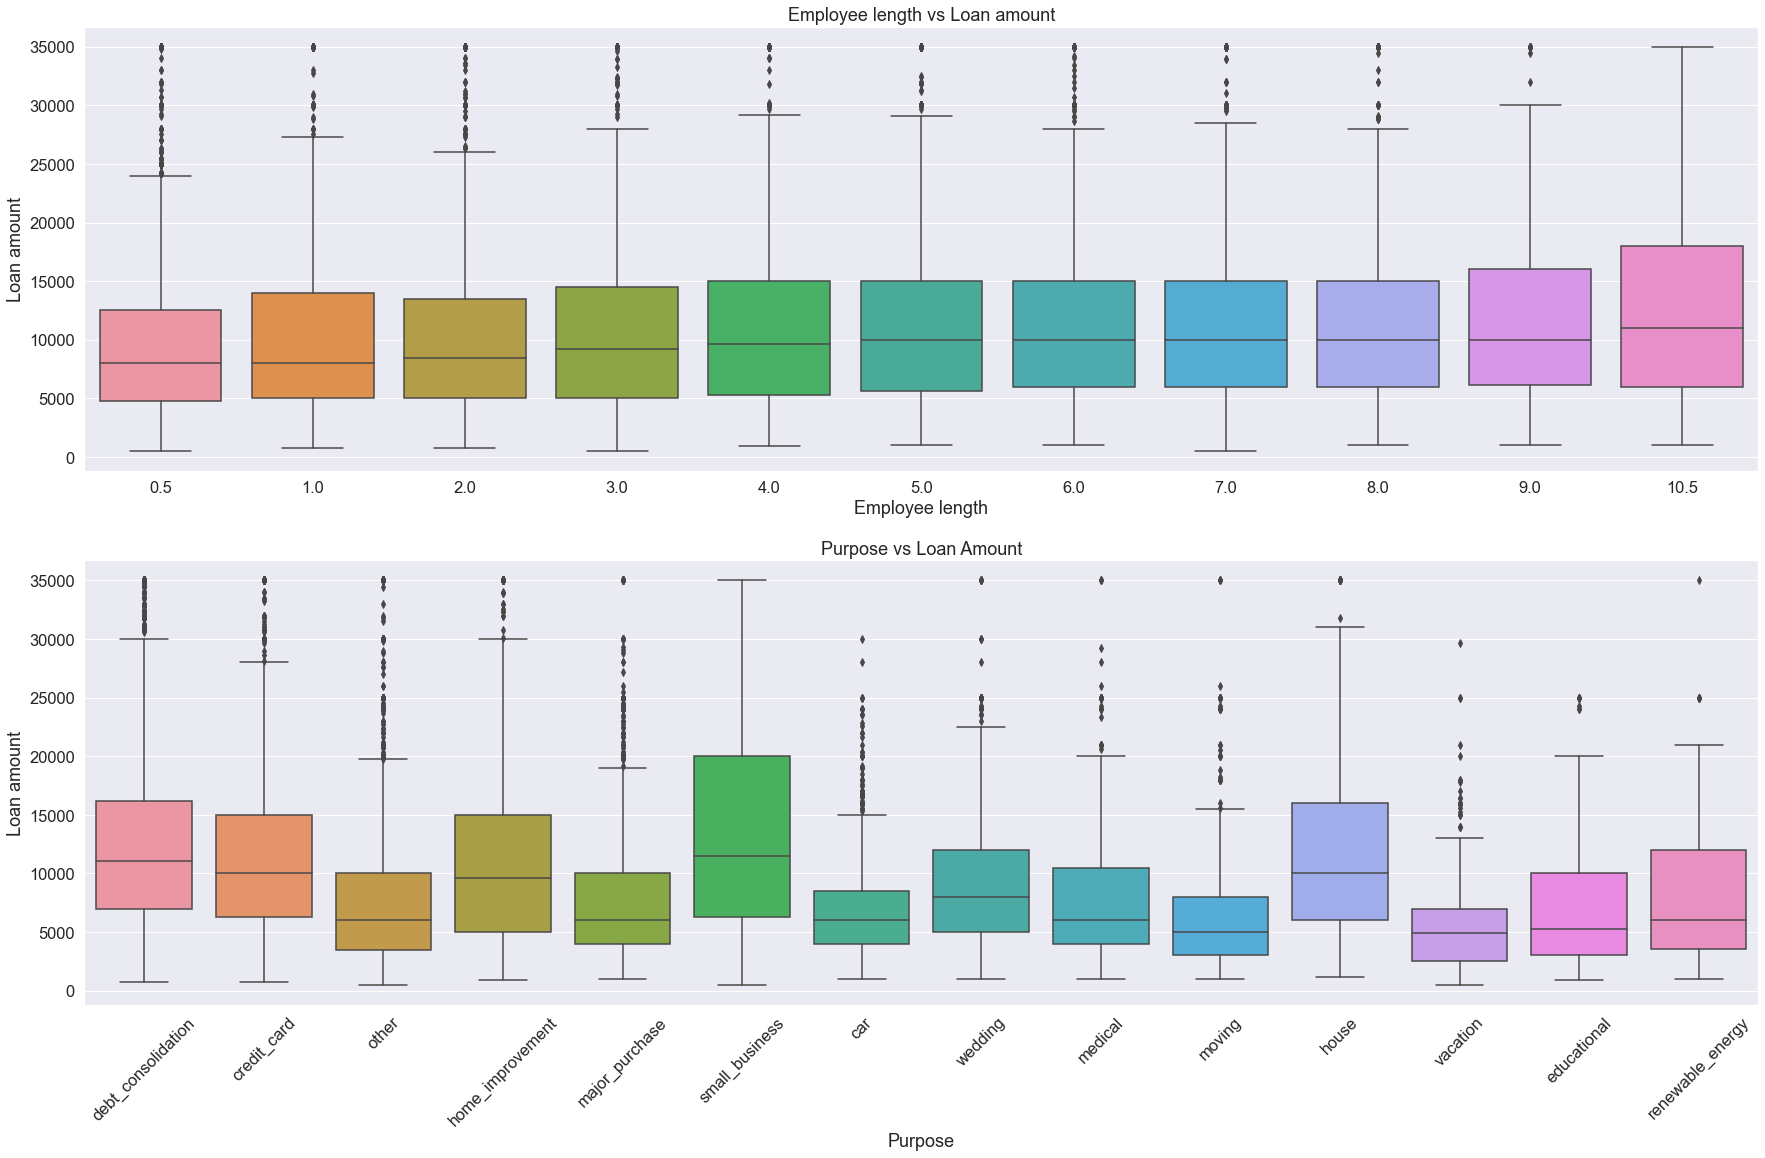

In [484]:
plt.figure(figsize=(30,18))
sns.set(font_scale=1.5) 

plt.subplot(2, 1, 1)
plt.title('Employee length vs Loan amount')
fig_1 = sns.boxplot(x=loans_df.emp_length, y=loans_df.loan_amnt, data=loans_df)
fig_1.set(xlabel = 'Employee length', ylabel='Loan amount')

plt.subplot(2,1,2)
plt.title('Purpose vs Loan Amount')
purpose_order = loans_df.purpose.value_counts().sort_values(ascending=False)
fig_2 = sns.boxplot(x=loans_df.purpose, y=loans_df.loan_amnt, order = purpose_order.index, data=loans_df)
fig_2.set(xlabel = 'Purpose', ylabel='Loan amount')
plt.xticks(rotation=45)
plt.show()

#### Analysis
1. Direct relation between employee length and loan amount.
2. Higher loan amounts for small business

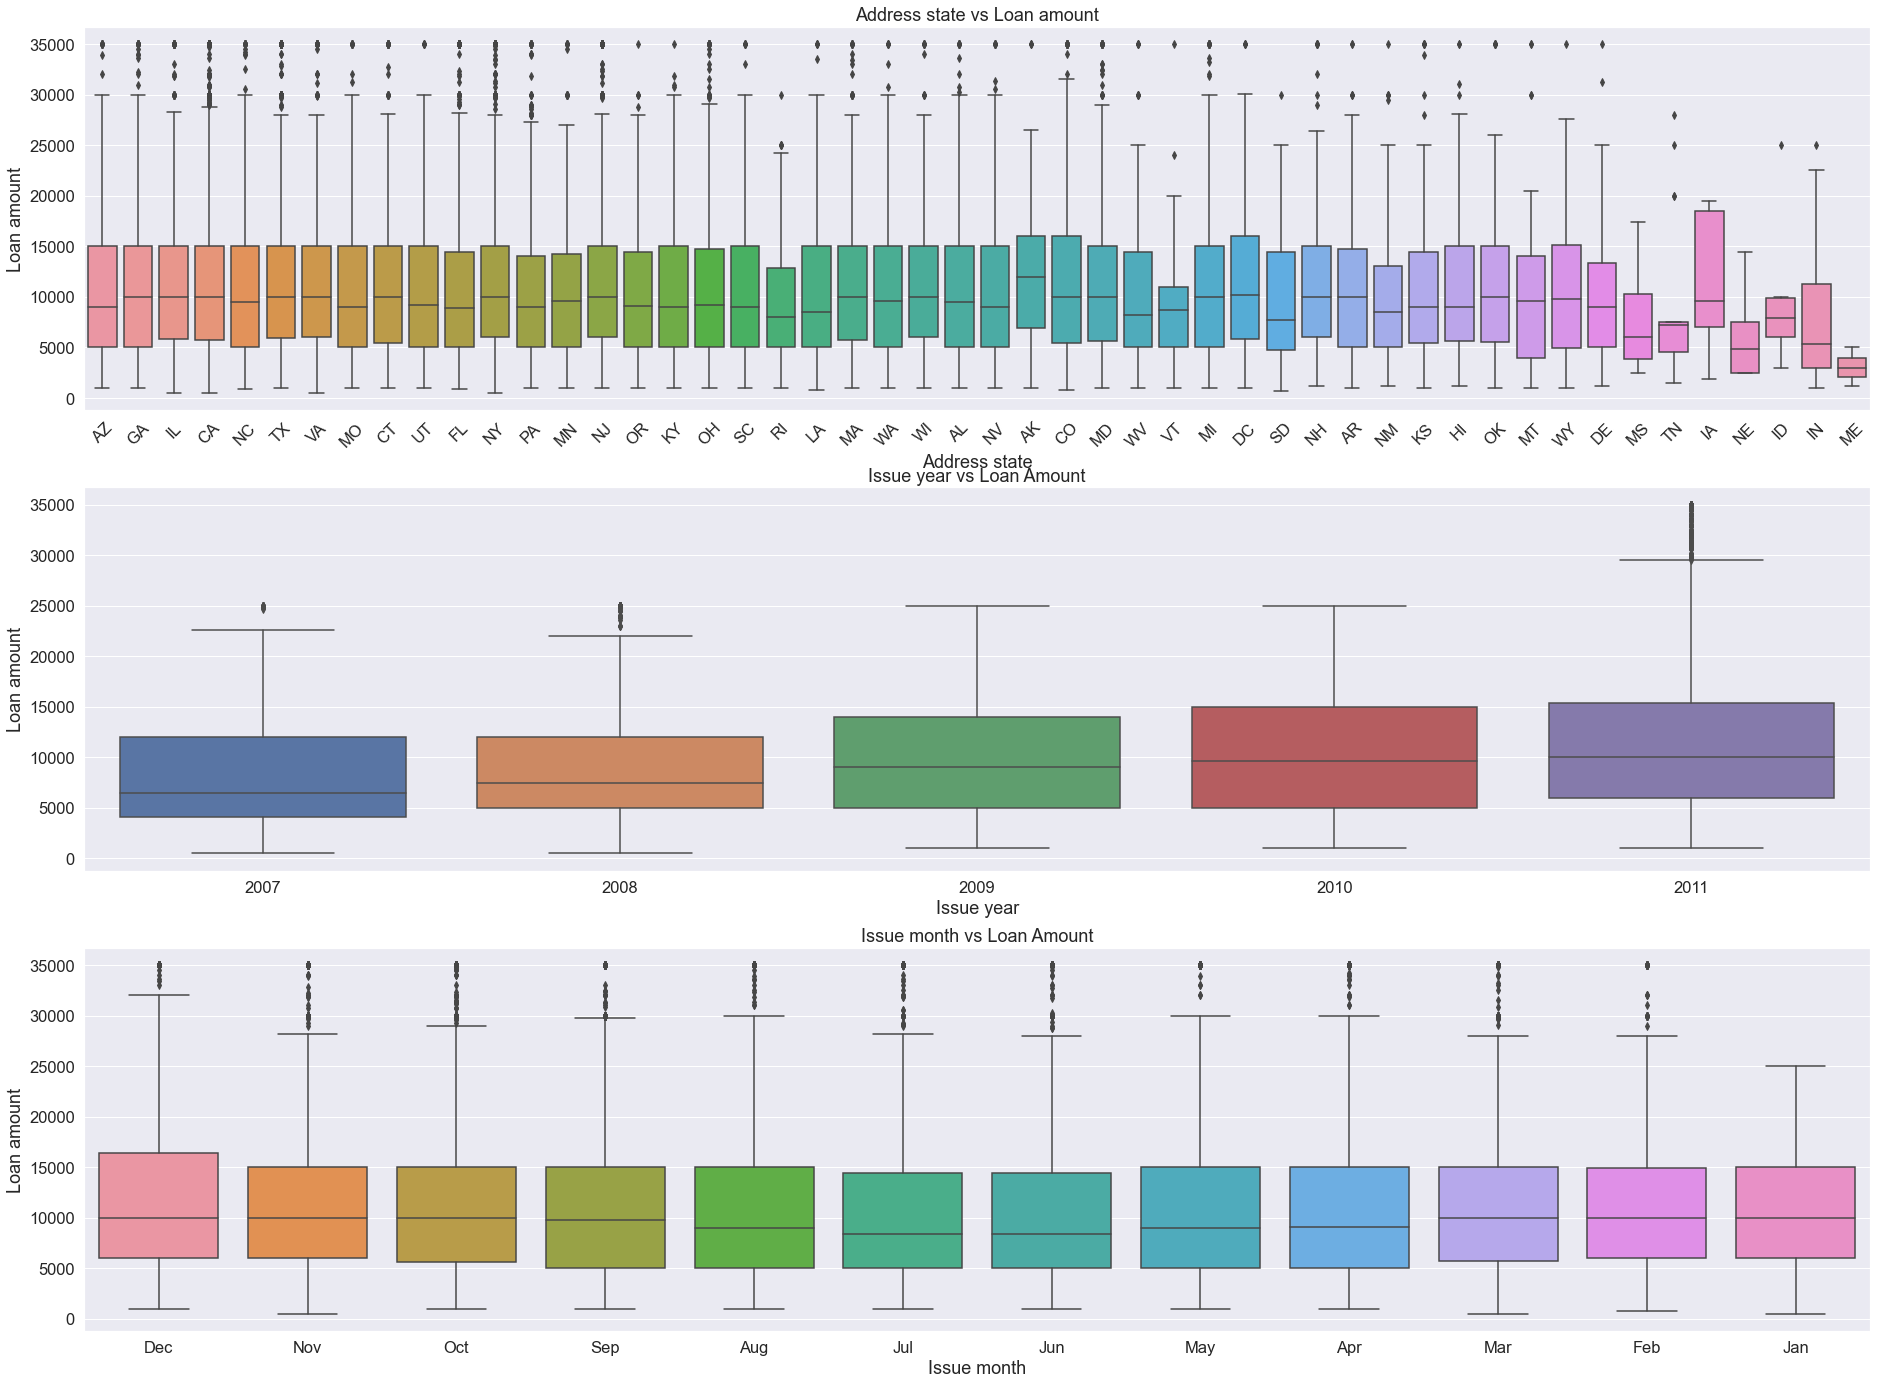

In [485]:
plt.figure(figsize=(32,24))
sns.set(font_scale=1.5) 

plt.subplot(3, 1, 1)
plt.title('Address state vs Loan amount')
fig_1 = sns.boxplot(x=loans_df.addr_state, y=loans_df.loan_amnt, data=loans_df)
fig_1.set(xlabel = 'Address state', ylabel='Loan amount')
plt.xticks(rotation=45)

plt.subplot(3,1,2)
plt.title('Issue year vs Loan Amount')
fig_2 = sns.boxplot(x=loans_df.issue_d_year, y=loans_df.loan_amnt, data=loans_df)
fig_2.set(xlabel = 'Issue year', ylabel='Loan amount')

plt.subplot(3,1,3)
plt.title('Issue month vs Loan Amount')
fig_3 = sns.boxplot(x=loans_df.issue_d_month, y=loans_df.loan_amnt, data=loans_df)
fig_3.set(xlabel = 'Issue month', ylabel='Loan amount')
plt.show()

#### Analysis
1. No significant relation between loan amount vs state other than state IA.
2. Loan Amount gradually increased as year passed away
3. December month lans amounts are little bit higher compared to other months.

### Experience v/s Income

#### Check on why 10+ years of people are highest defautlers (16%).


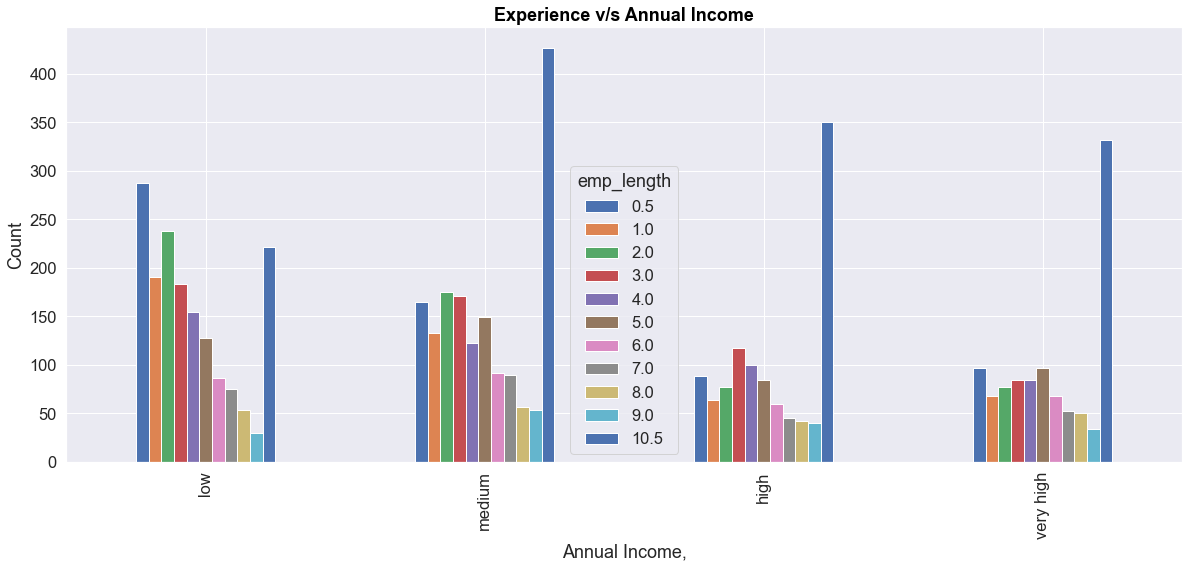

In [486]:

loans_df[loans_df.loan_status == 1].groupby(['ann_inc_bins'])['emp_length'].value_counts().unstack().plot.bar(figsize=(20,8))
plt.xlabel("Annual Income,")
plt.ylabel("Count")
plt.title("Experience v/s Annual Income",color='black',fontweight='bold')

plt.show()

#### Analysis
1. 10+ years do have higher annual income, so why do they default more ?

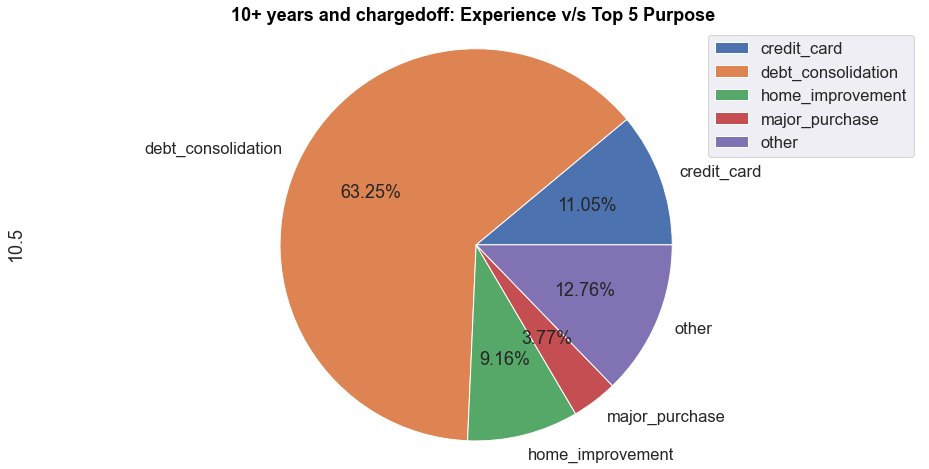

In [487]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
                 (loans_df.emp_length == 10.5) &
                 (loans_df.purpose.isin(top_5_purpose))].groupby(
                ['purpose'])['emp_length'].value_counts().unstack().plot.pie(figsize=(16,8),
                                                                             subplots=True,
                                                                             autopct='%1.2f%%')
plt.title("10+ years and chargedoff: Experience v/s Top 5 Purpose ",color='black',fontweight='bold')
plt.axis('equal') 
plt.show()

#### Analysis
1. They do take 63.25% of loans for debt consolidation
2. It might be the case that higher the annual income they do occur more debts.

## Analyse Purpose attribute to see the importance of this being a driver 

### Loan Amount v/s Purpose for defaulters


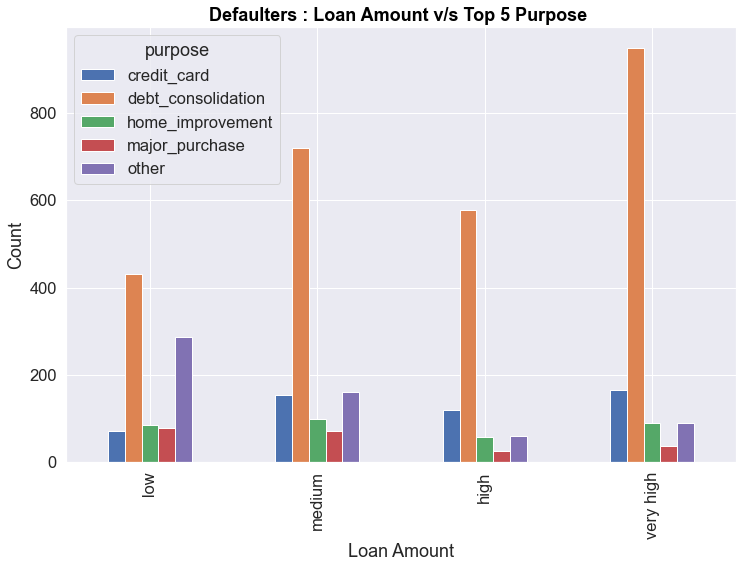

In [488]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(['loan_amnt_bins'])['purpose'].value_counts().unstack().plot.bar(figsize=(12,8))
plt.title("Defaulters : Loan Amount v/s Top 5 Purpose ",color='black',fontweight='bold')
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

#### Analysis
1. Debt consolidation stands out to be a main purpose for all the ranges of Loan Amount

### Issued Month v/s Purpose for defaulters


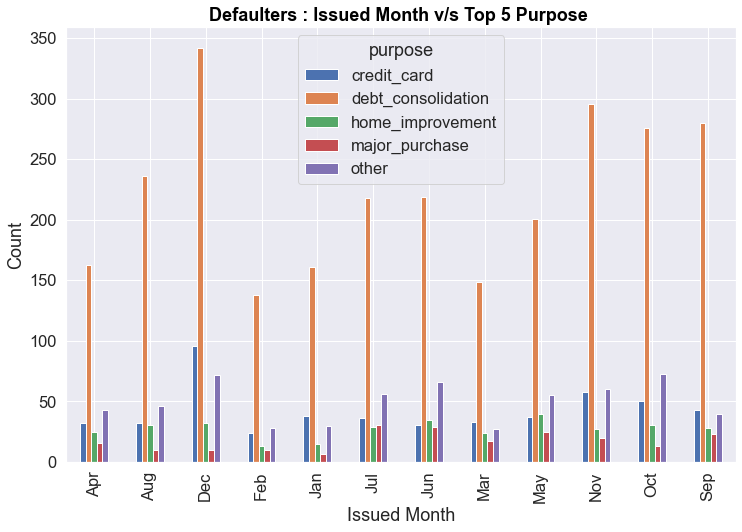

In [489]:
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(['issue_d_month'])['purpose'].value_counts().unstack().plot.bar(figsize=(12,8))
plt.title("Defaulters : Issued Month v/s Top 5 Purpose ",color='black',fontweight='bold')
plt.xlabel("Issued Month")
plt.ylabel("Count")
plt.show()



#### Analysis
1. Debt consolidation stands out to be a main purpose for all seasons.

### Defaulters v/s Loan Term v/s purpose

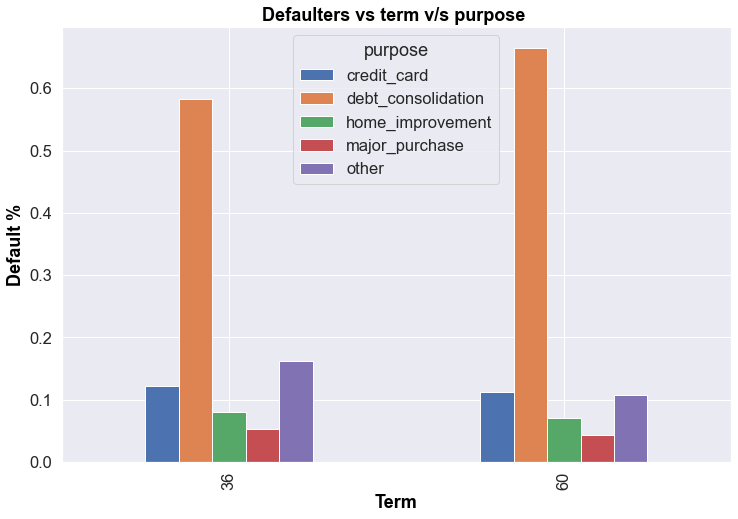

In [490]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(
                                           ['term'])['purpose'].value_counts(normalize=True).unstack().plot.bar(figsize=(12,8))


plt.xlabel('Term',color='black',fontweight='bold')
plt.ylabel('Default %',color='black',fontweight='bold')
plt.title("Defaulters vs term v/s purpose ",color='black',fontweight='bold')
plt.show()

#### Analysis
1. Debt consolidation stands out to be a main purpose for all terms.
2. Term is not a driver for defaulters as we can see for both 36 and 60 months for top 5 products trends are same. 

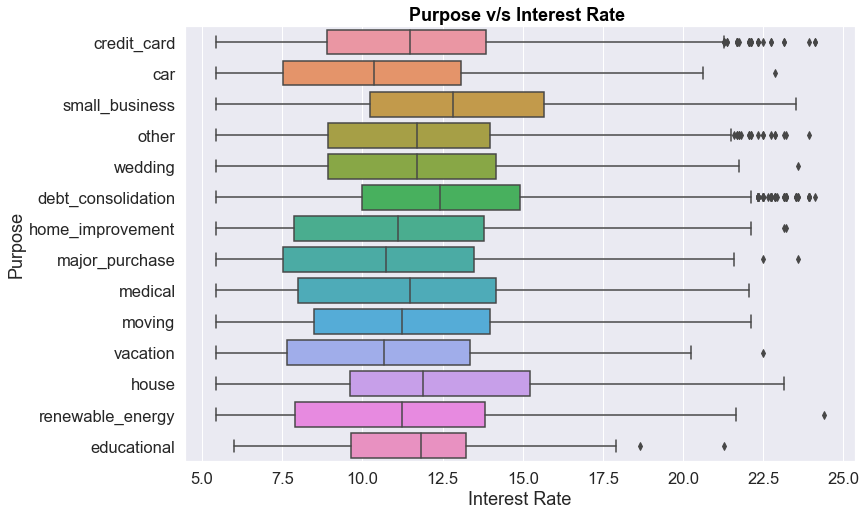

In [491]:
plt.figure(figsize=(12,8))
sns.boxplot(y='purpose', x='int_rate', data =loans_df)
plt.title("Purpose v/s Interest Rate ",color='black',fontweight='bold')
plt.xlabel("Interest Rate")
plt.ylabel("Purpose")
plt.show()

#### Analysis
1. Although Debt consolidation is purpose which has 16% percentage of applicants opting for, but the intrerest rate is higher for small business in comparison to debt consolidation.

### Analyse Month attribute to see the importance of this being a driver 


### Month v/s Loan Amount

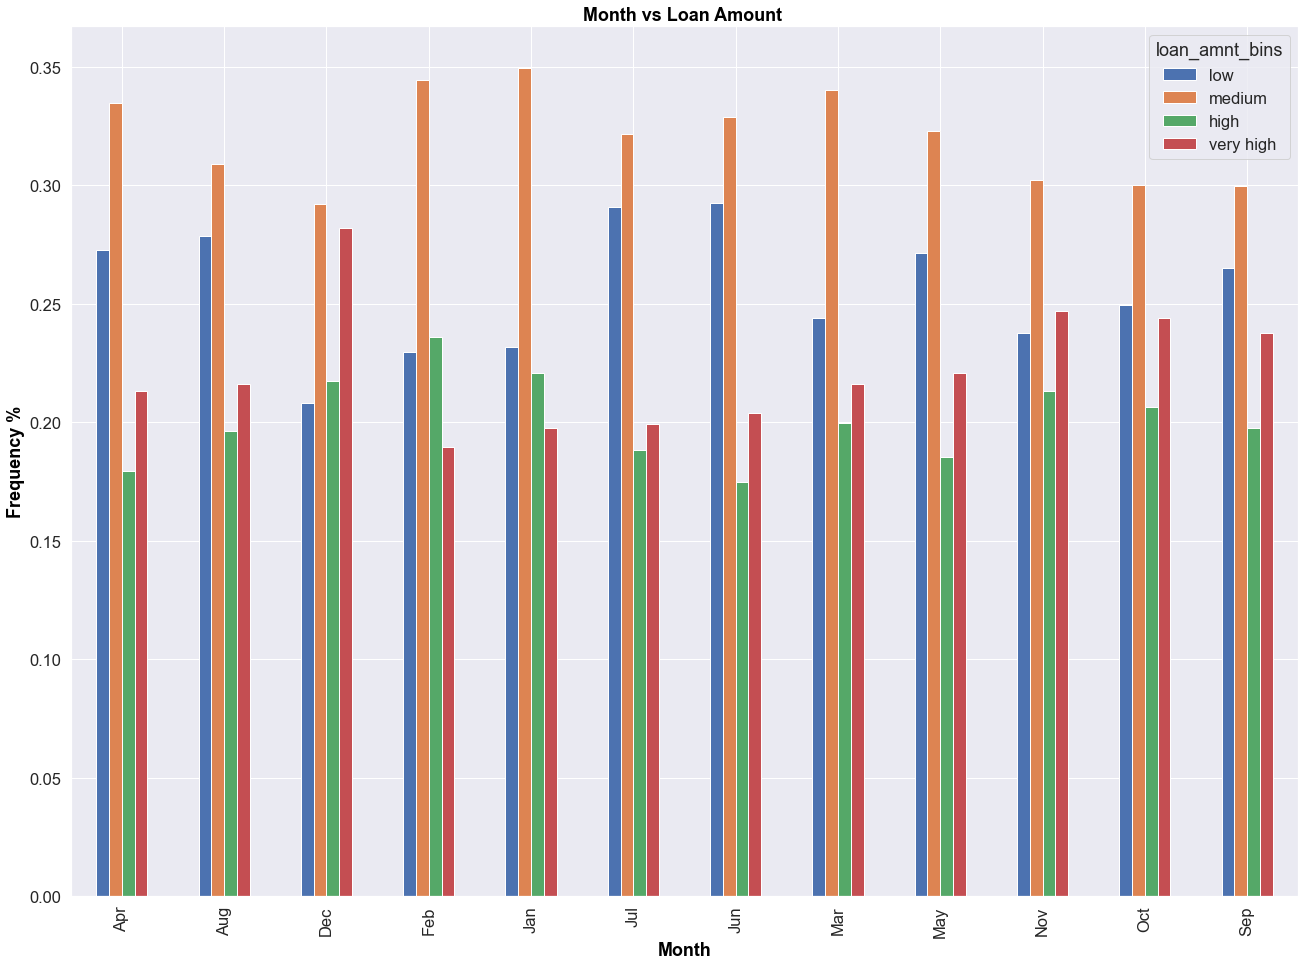

In [492]:
loans_df.groupby(['issue_d_month'])['loan_amnt_bins'].value_counts(normalize=True).unstack().plot.bar(figsize=(22,16))
plt.xlabel('Month',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Month vs Loan Amount ",color='black',fontweight='bold')
plt.show()


### Analyse Grade attribute to see the importance of this being a driver 


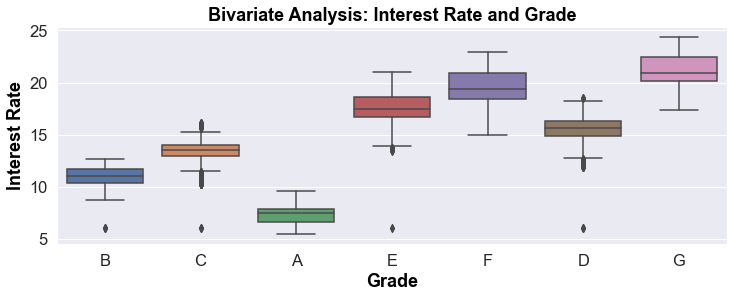

In [493]:
plt.figure(figsize=(12,4))
sns.boxplot(y='int_rate', x='grade', data=loans_df)
plt.title('Bivariate Analysis: Interest Rate and Grade',color='black',fontweight='bold')
plt.ylabel('Interest Rate',color='black',fontweight='bold')
plt.xlabel('Grade',color='black',fontweight='bold')
plt.show()

### Analyse Home Ownership attribute to see the importance of this being a driver 

#### Analyse the reason behind why home owners have higher percentage of being defaulter


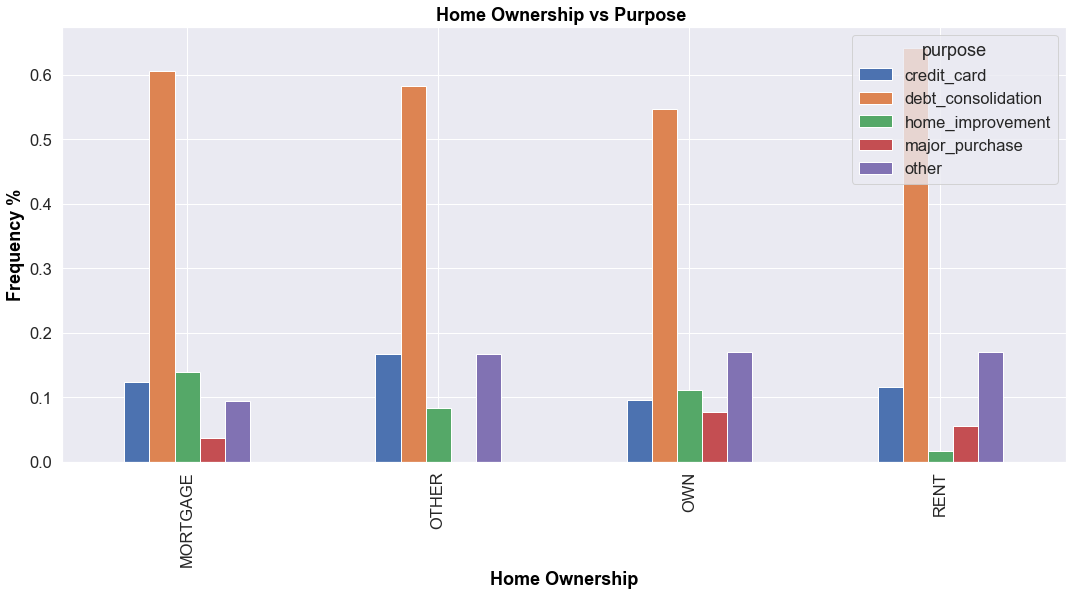

In [494]:
top_5_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(5)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_5_purpose))].groupby(
                                           ['home_ownership'])['purpose'].value_counts(normalize=True).unstack().plot.bar(figsize=(18,8))
plt.xlabel('Home Ownership',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Home Ownership vs Purpose ",color='black',fontweight='bold')
plt.show()

#### Analysis
Those who own the house they tend to take more loans for home improvement and major purchases

### Analyse State attribute to see the importance of this being a driver 


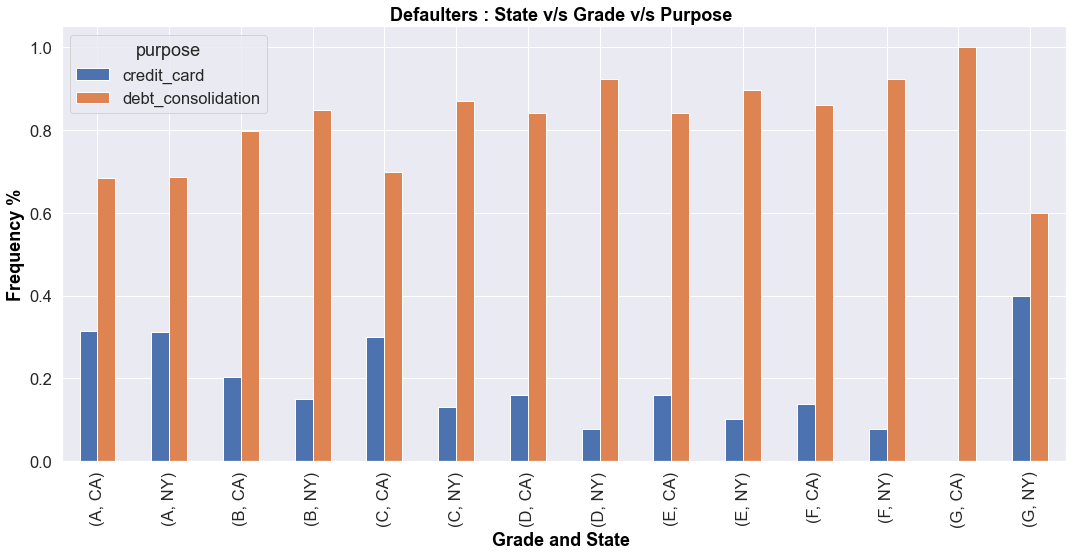

In [495]:
# View defaulters for top 2 states against top 2 purpose for all grades

top_2_purpose = loans_df.purpose.value_counts(sorted).reset_index().head(2)['index']
top_2_states = loans_df.addr_state.value_counts(sorted).reset_index().head(2)['index']
loans_df[(loans_df.loan_status == 1) & 
         (loans_df.purpose.isin(top_2_purpose)) & 
         (loans_df.addr_state.isin(top_2_states))].groupby(
                                           ['grade','addr_state'])['purpose'].value_counts(normalize=True).unstack().plot.bar(figsize=(18,8))
plt.xlabel('Grade and State ',color='black',fontweight='bold')
plt.ylabel('Frequency %',color='black',fontweight='bold')
plt.title("Defaulters : State v/s Grade v/s Purpose ",color='black',fontweight='bold')
plt.show()
